In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

index

gender: 성별

car: 차량 소유 여부 

reality: 부동산 소유 여부

child_num: 자녀 수

income_total: 연간 소득

income_type: 소득 분류
							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

edu_type: 교육 수준
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

family_type: 결혼 여부
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

house_type: 생활 방식
							```['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

DAYS_BIRTH: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

DAYS_EMPLOYED: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함

FLAG_MOBIL: 핸드폰 소유 여부

work_phone: 업무용 전화 소유 여부

phone: 전화 소유 여부

email: 이메일 소유 여부

occyp_type: 직업 유형													

family_size: 가족 규모

begin_month: 신용카드 발급 월
						데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/신용카드 사용자/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/신용카드 사용자/test.csv')

test.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0


In [ ]:
train.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


# EDA

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (7, 7)
sns.set_style("whitegrid")

gender: 성별

F    17697
M     8760
Name: gender, dtype: int64


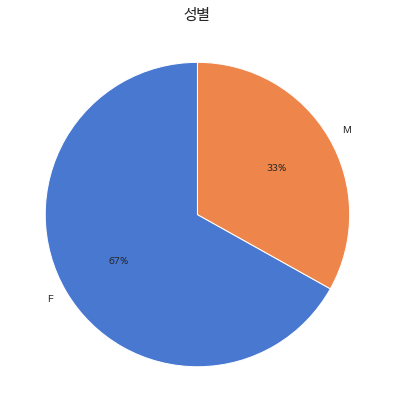

In [ ]:
print(train['gender'].value_counts())

plt.rc('font', family='NanumBarunGothic')
#define Seaborn color palette to use
colors = sns.color_palette('muted')[0:5]
#create pie chart
plt.pie(train['gender'].value_counts(), labels = train['gender'].value_counts().index, colors = colors, autopct='%.0f%%', startangle=90)
plt.title('성별', fontsize=15)
plt.show()

car: 차량 소유 여부

N    16410
Y    10047
Name: car, dtype: int64


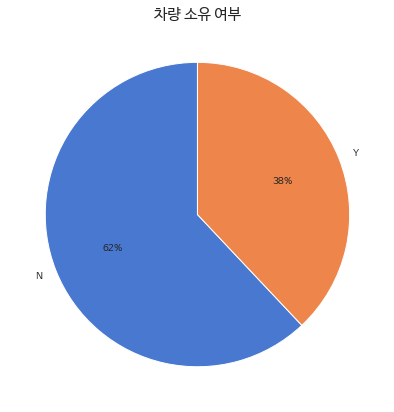

In [ ]:
print(train['car'].value_counts())

colors = sns.color_palette('muted')
#create pie chart
plt.pie(train['car'].value_counts(), labels = train['car'].value_counts().index, colors = colors, autopct='%.0f%%', startangle=90)
plt.title('차량 소유 여부', fontsize=15)
plt.show()

reality: 부동산 소유 여부

Y    17830
N     8627
Name: reality, dtype: int64


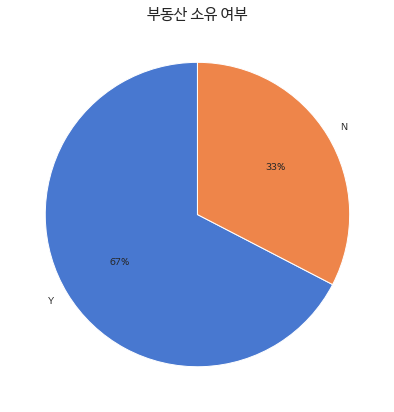

In [ ]:
print(train['reality'].value_counts())

colors = sns.color_palette('muted')
#create pie chart
plt.pie(train['reality'].value_counts(), labels = train['reality'].value_counts().index, colors = colors, autopct='%.0f%%', startangle=90)
plt.title('부동산 소유 여부', fontsize=15)
plt.show()

child_num: 자녀 수

0     0.693200
1     0.203576
2     0.089277
3     0.011566
4     0.001776
5     0.000378
14    0.000113
7     0.000076
19    0.000038
Name: child_num, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


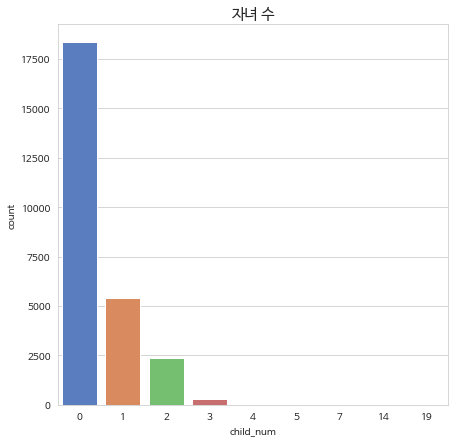

In [ ]:
print(train['child_num'].value_counts(normalize=True))

sns.countplot(train['child_num'], palette='muted')
plt.title('자녀 수', fontsize=15)
plt.show()

income_total: 연간 소득

[income_type: 소득 분류]


'Commercial associate' : 상업가

'Working' : 직장인

'State servant' : 공무원

'Pensioner' : 연금 수령자

'Student' : 학생

Working                 1639
Commercial associate     782
Pensioner                536
State servant            265
Name: income_type, dtype: int64

소득 유형별 소득 합계:  income_type
Commercial associate    172700163.0
Pensioner                79333650.0
State servant            57685950.0
Working                 305062267.5
Name: income_total, dtype: float64

소득 유형별 소득 평균:  income_type
Commercial associate    220844.198210
Pensioner               148010.541045
State servant           217682.830189
Working                 186127.069860
Name: income_total, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


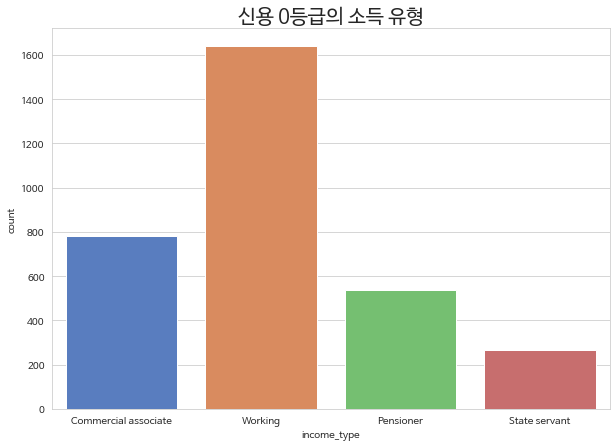

In [ ]:
# 신용 0등급의 소득 분류(유형)별 소득 수준
print(train.loc[train['credit'] == 0.0, 'income_type'].value_counts())
print()
print('소득 유형별 소득 합계: ',train.groupby(['credit', 'income_type']).income_total.sum()[0])
print()
print('소득 유형별 소득 평균: ',train.groupby(['credit', 'income_type']).income_total.mean()[0])

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 7)
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')
sns.countplot(train.loc[train['credit'] == 0.0, 'income_type'], palette='muted')
plt.title('신용 0등급의 소득 유형', fontsize=20)
plt.show()
print()

60    2486
50    1795
40     122
30      30
20      16
Name: DAYS_BIRTH, dtype: int64
Int64Index([60, 50, 40, 30, 20], dtype='int64')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


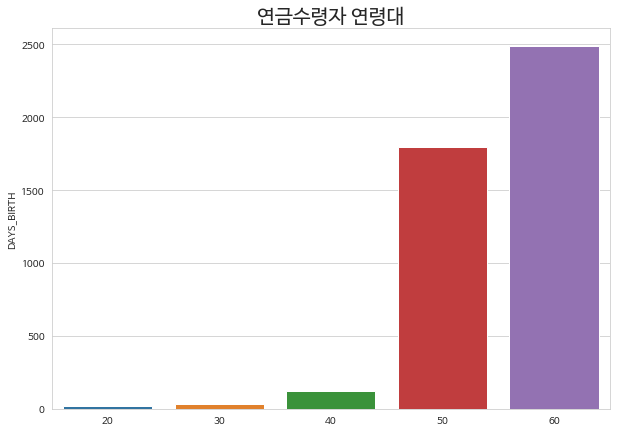

In [ ]:
# Pensioner(연금수령자=신용 0등급이지만 소득액 낮은)의 연령대 확인
print(train[train['income_type'] == 'Pensioner']['DAYS_BIRTH'].value_counts())
print(train[train['income_type'] == 'Pensioner']['DAYS_BIRTH'].value_counts().index)
sns.barplot(train[train['income_type'] == 'Pensioner']['DAYS_BIRTH'].value_counts().index, train[train['income_type'] == 'Pensioner']['DAYS_BIRTH'].value_counts())
plt.title('연금수령자 연령대', fontsize=20)
plt.show()

[edu_type: 교육 수준]

 'Higher education' : 고등학교

 'Secondary / secondary special' : 중학교

 'Incomplete higher' : 고등학교 중퇴

 'Lower secondary' : 초등학교

 'Academic degree' : 대학교

In [ ]:
from matplotlib import rcParams

2    17995
4     7162
3     1020
1      257
5       23
Name: edu_type, dtype: int64


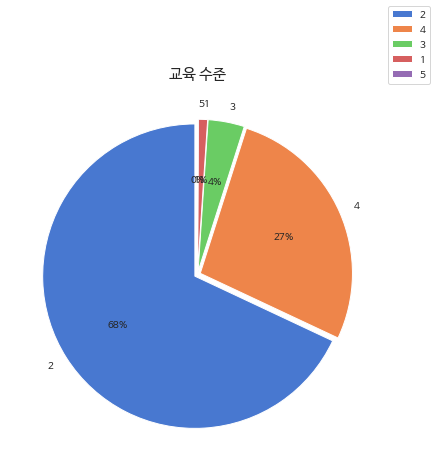

In [ ]:
# 교육 수준 현황
print(train['edu_type'].value_counts())

#create pie chart
rcParams['figure.figsize'] = (15, 7)
olors = sns.color_palette('muted')
explode = pd.Series([0.02, 0.02, 0.02, 0.02, 0.02], index = train['edu_type'].value_counts().index)
plt.rc('font', family='NanumBarunGothic')
plt.pie(train['edu_type'].value_counts(), labels = train['edu_type'].value_counts().index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('교육 수준', fontsize=15)
plt.legend(loc=(1., 1.))
plt.rc('legend', fontsize=13)  # 범례 폰트 크기
plt.show()

[family_type: 결혼 여부]

 'Married' : 기혼

 'Civil marriage' : 법률혼(법적 인정X)

 'Separated' : 이혼

 'Single / not married' : 미혼(싱글포함)

 'Widow' : 과부

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64


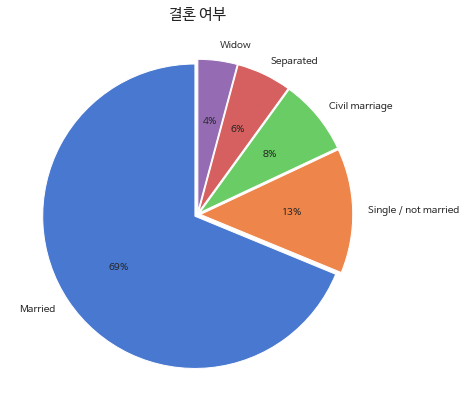

In [ ]:
# 가족 유형 현황(결혼 여부 중점)
print(train['family_type'].value_counts())

#create pie chart
colors = sns.color_palette('muted')
explode = pd.Series([0.02, 0.02, 0.02, 0.02, 0.02], index = train['family_type'].value_counts().index)
plt.pie(train['family_type'].value_counts(), labels = train['family_type'].value_counts().index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('결혼 여부', fontsize=15)
plt.show()

[house_type: 생활 방식]

'Municipal apartment' : 시립 아파트

'House / apartment' : 빌라

'With parents' : 부모님집

'Co-op apartment' : 기업 소유 건물 (하나 이상의 주거용 건물로 구성된 부동산을 소유 한 법인)

'Rented apartment' : 월세

'Office apartment' : 오피스텔

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64


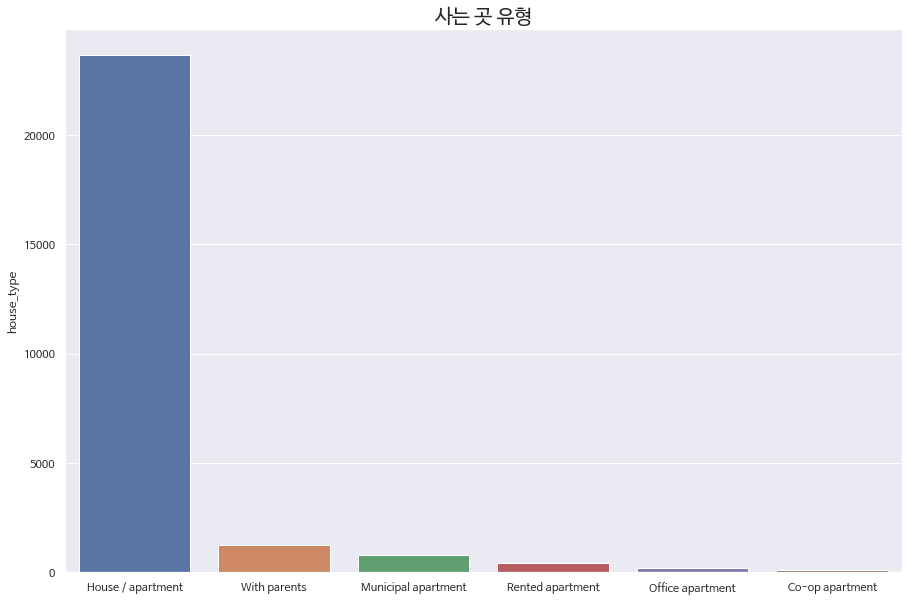

In [ ]:
# 사는 곳 유형
print(train['house_type'].value_counts())

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=list(train['house_type'].value_counts().index), y=train['house_type'].value_counts(), data=train)
plt.rc('font', family='NanumBarunGothic')
plt.title('사는 곳 유형', fontsize=20)
plt.show()

DAYS_BIRTH: 출생일

: 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

DAYS_EMPLOYED: 업무 시작일

: 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함

FLAG_MOBIL: 핸드폰 소유 여부

1    26457
Name: FLAG_MOBIL, dtype: int64


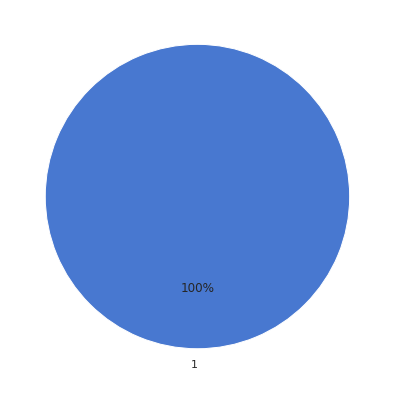

In [ ]:
# 불필요 특성 확인: 핸드폰 소유 여부
print(train['FLAG_MOBIL'].value_counts())

colors = sns.color_palette('muted')
sns.set(rc = {'figure.figsize':(7,7)})
#create pie chart
plt.pie(train['FLAG_MOBIL'].value_counts(), labels = train['FLAG_MOBIL'].value_counts().index, colors = colors, autopct='%.0f%%', startangle=90)
plt.show()

work_phone: 업무용 전화 소유 여부

0    20511
1     5946
Name: work_phone, dtype: int64


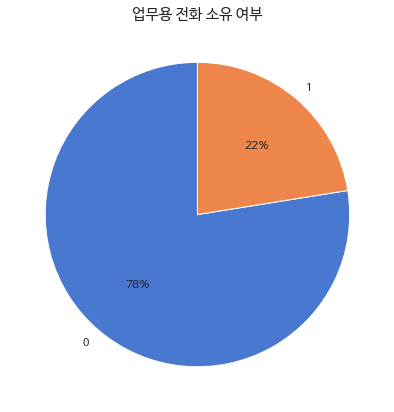

In [ ]:
# 업무용 전화 소유 여부
print(train['work_phone'].value_counts())

#create pie chart
colors = sns.color_palette('muted')
plt.rc('font', family='NanumBarunGothic')
plt.pie(train['work_phone'].value_counts(), labels = train['work_phone'].value_counts().index, colors = colors, autopct='%.0f%%', startangle=90)
plt.title('업무용 전화 소유 여부', fontsize=15)
plt.show()

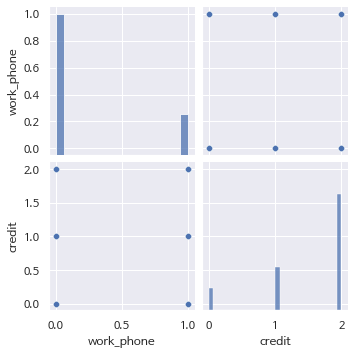

In [ ]:
# 신용 등급과 업무용 전화 소유 여부는 상관관계 없음
sns.pairplot(train[['work_phone','credit']])

phone: 전화 소유 여부

0    18672
1     7785
Name: phone, dtype: int64


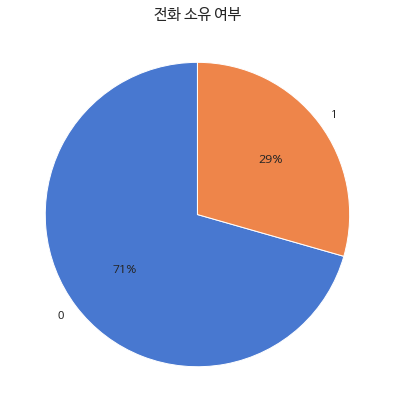

In [ ]:
# 전화 소유 여부
print(train['phone'].value_counts())

#create pie chart
colors = sns.color_palette('muted')
plt.pie(train['phone'].value_counts(), labels = train['phone'].value_counts().index, colors = colors, autopct='%.0f%%', startangle=90)
plt.title('전화 소유 여부', fontsize=15)
plt.show()

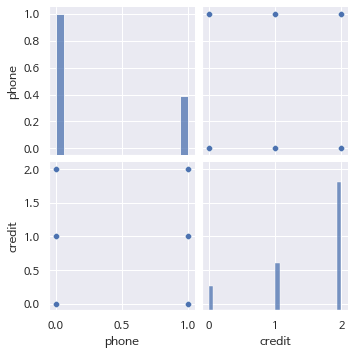

In [ ]:
# 신용 등급과 전화 소유 여부는 상관관계 없음
sns.pairplot(train[['phone','credit']])

email: 이메일 소유 여부

0    24042
1     2415
Name: email, dtype: int64


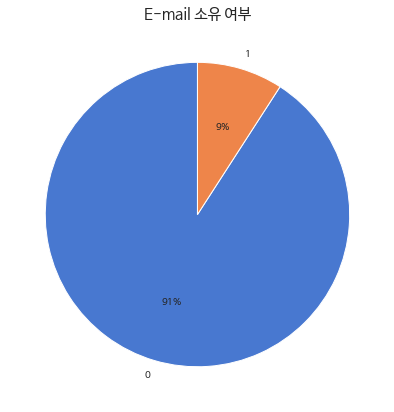

In [ ]:
# 이메일 소유 여부
print(train['email'].value_counts())

#create pie chart
colors = sns.color_palette('muted')
plt.pie(train['email'].value_counts(), labels = train['email'].value_counts().index, colors = colors, autopct='%.0f%%', startangle=90)
plt.title('E-mail 소유 여부', fontsize=15)
plt.show()

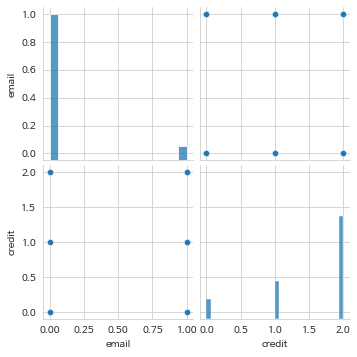

In [ ]:
# 신용 등급과 업무용 이메일 소유 여부는 상관관계 없음
sns.pairplot(train[['email','credit']])

In [ ]:
train.groupby(['email','credit']).credit.count()

email  credit
0      0.0        2953
       1.0        5724
       2.0       15365
1      0.0         269
       1.0         543
       2.0        1603
Name: credit, dtype: int64

occyp_type: 직업 유형

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64


Text(0.5, 1.0, '직업 유형')

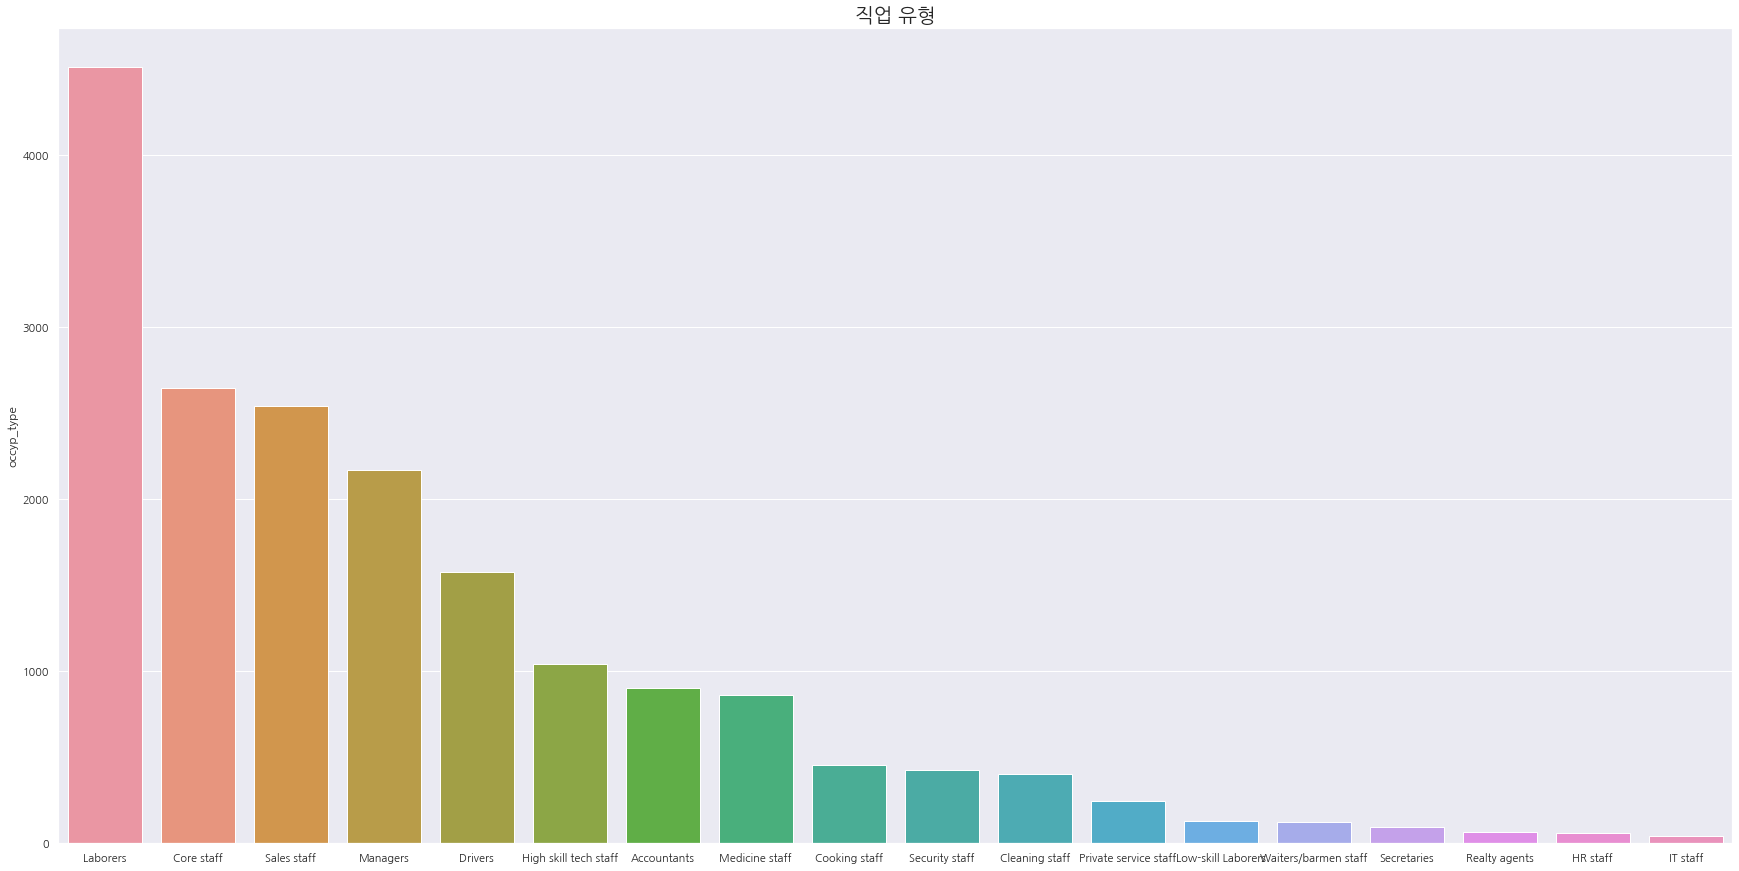

In [ ]:
# 직업 유형(직종) 현황
print(train['occyp_type'].value_counts())

sns.set(font="NanumGothic", rc={'figure.figsize':(30,15), "axes.unicode_minus":False}, style='darkgrid')
sns.barplot(x=list(train['occyp_type'].value_counts().index), y=train['occyp_type'].value_counts(), data=train)
plt.title('직업 유형', fontsize=20)

family_size: 가족 규모

2.0     0.533167
1.0     0.193106
3.0     0.175077
4.0     0.085422
5.0     0.010999
6.0     0.001663
7.0     0.000340
15.0    0.000113
9.0     0.000076
20.0    0.000038
Name: family_size, dtype: float64


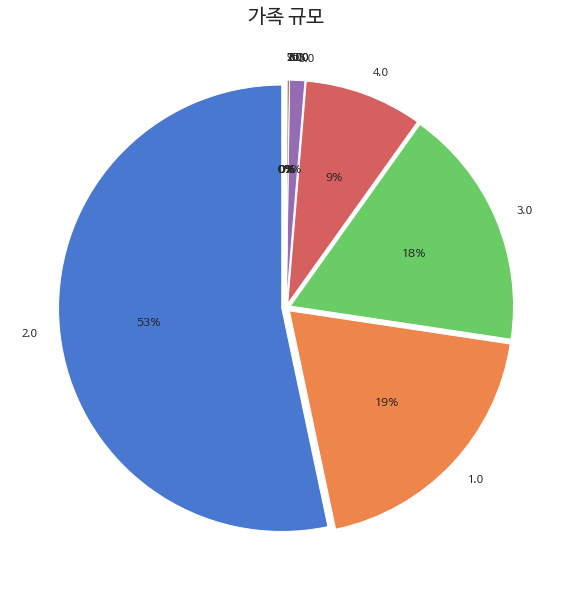

In [ ]:
# 가족 규모 현황(1인, 2인, 3인....)
print(train['family_size'].value_counts(normalize=True))

#create pie chart
olors = sns.color_palette('muted')
sns.set(rc = {'figure.figsize':(10,12)})
explode = pd.Series([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02], index = train['family_size'].value_counts().index)
plt.rc('font', family='NanumBarunGothic')
plt.pie(train['family_size'].value_counts(), labels = train['family_size'].value_counts().index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('가족 규모', fontsize=20)
plt.show()

begin_month: 신용카드 발급

: 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

1    6410
2    6274
3    4573
4    4290
0    3446
5    1464
Name: begin_month, dtype: int64


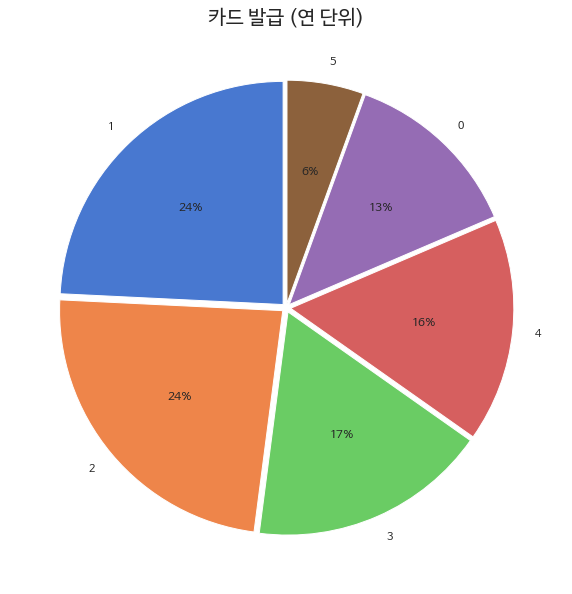

In [ ]:
# 신용 카드 발급(연 단위) 현황
# 0 == 카드 발급 안함
print(train['begin_month'].value_counts())

explode = pd.Series([0.02, 0.02, 0.02, 0.02, 0.02, 0.02], index = train['begin_month'].value_counts().index)
plt.rc('font', family='NanumBarunGothic')
plt.pie(train['begin_month'].value_counts(), labels = train['begin_month'].value_counts().index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('카드 발급 (연 단위)', fontsize=20)
plt.show()

In [ ]:
# 신용 0등급 & 카드 발급 2년 이내 고객 & 차 + 부동산
condition = (train['begin_month'] < 3) & (train['credit'] == 0.0)
temp0 = train.loc[condition, ['income_total','reality','car','house_type']]
print(temp0.shape)
display(temp0.head())

print(temp0['reality'].value_counts(normalize=True))
print()
print(temp0['car'].value_counts(True))
condition = (train['car'] == 1) & (train['reality'] == 1) & (train['credit'] == 0.0)
print()
print(train[condition].count()[0])

(2093, 4)


,income_total,reality,car,house_type
22,15.75,0,0,House / apartment
29,12.15,1,0,Co-op apartment
31,13.50,1,1,House / apartment
32,13.50,1,0,House / apartment
34,27.00,1,1,House / apartment


1    0.670807
0    0.329193
Name: reality, dtype: float64

0    0.622074
1    0.377926
Name: car, dtype: float64

789


In [ ]:
# 신용 0등급 & 카드 발급 2년 이내 고객 & 차 + 부동산 비율
(789 / 2093)*100

37.69708552317248

In [ ]:
# 신용 2등급 & 카드 발급 2년 이내 고객 & 차 + 부동산
condition = (train['begin_month'] < 3) & (train['credit'] == 2.0)
temp2 = train.loc[condition, ['income_total','reality','car','house_type']]
print(temp2.shape)
display(temp2.head())
print()
print(temp2['reality'].value_counts())
print()
print(temp2['car'].value_counts())
print()
print(temp2[(temp2['car'] == 1) & (temp2['reality'] == 1)].count()[0])

(9657, 4)


,income_total,reality,car,house_type
2,45.00,1,1,House / apartment
4,15.75,1,1,House / apartment
9,10.35,1,0,House / apartment
17,27.00,0,0,With parents
19,18.00,1,0,House / apartment



1    6432
0    3225
Name: reality, dtype: int64

0    5950
1    3707
Name: car, dtype: int64

2461


In [ ]:
# 신용 2등급 & 카드 발급 2년 이내 고객 & 차 + 부동산 비율
(2461 / 9657)*100

25.484104794449625

[credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도]

: 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [ ]:
plt.rc('font', family='NanumBarunGothic')

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64


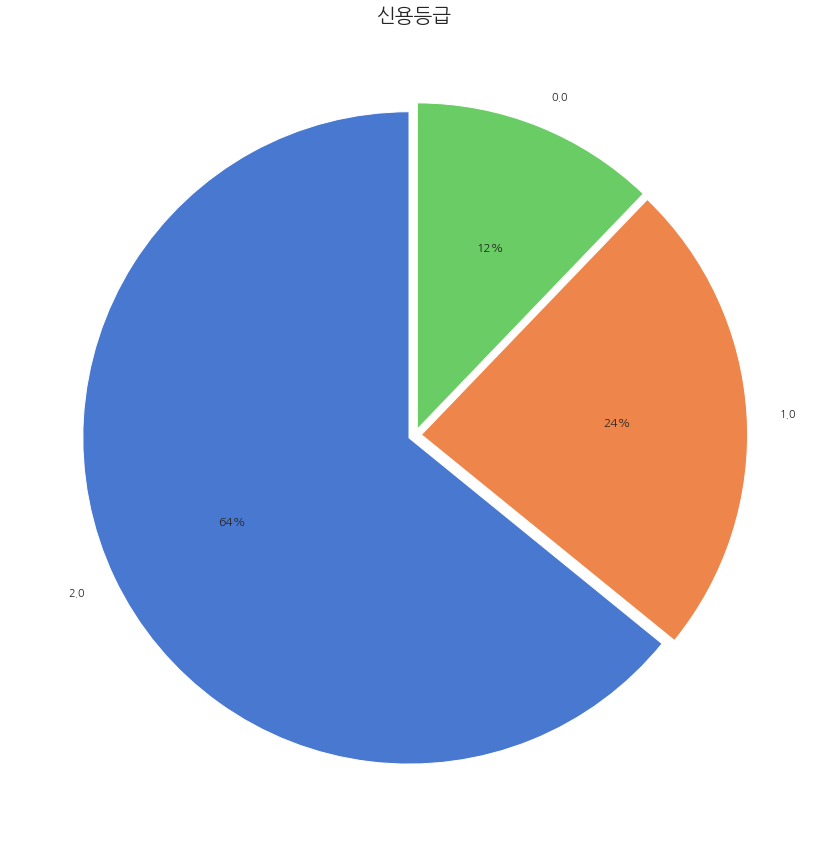

In [ ]:
# 신용등급에 따른 분류
print(train['credit'].value_counts())

colors = sns.color_palette('muted')
explode = pd.Series([0.02, 0.02, 0.02], index = train['credit'].value_counts().index)
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('신용등급', fontsize=20)
plt.show()

# Groupby & EDA


## 데이터 전처리 수행

In [ ]:
def gender(df): # F(여자):0 M(남자):1
  df['gender'] = df['gender'].replace(['F','M'], [0, 1])
  return df['gender']

def car(df): # N(차 없음):0 Y(차 있음):1
  df['car'] = df['car'].replace(['N','Y'], [0, 1])
  return df['car']

def reality(df): # N(부동산 없음):0 Y(부동산 있음):1
  df['reality'] = df['reality'].replace(['N','Y'], [0, 1])
  return df['reality']

def income_total(df):
  df['income_total'] = df['income_total'] / 10000
  return df['income_total'] # 소득액 10,000 단위로 환산

def income_type(df): # 소득 유형 >> one-hot-encoding 수행
  pass

def edu_type(df): #  'Lower secondary(초등)':1, 'Secondary / secondary special(중등)':2, 'Incomplete higher(고등 중퇴)':3, 'Higher education(고등)':4, 'Academic degree(대학)':5
  df['edu_type'] = df['edu_type'].replace(['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'], [4, 2, 3, 1 ,5])
  return df['edu_type']

def family_type(df): # 결혼 여부 >> one-hot-encoding 수행
  pass

def house_type(df): # 생활 형식 >> one-hot-encoding 수행
  pass

# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
def DAYS_BIRTH(df):
  df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(abs) / 365
  df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(round)
  df['DAYS_BIRTH'] = np.select([df['DAYS_BIRTH'] < 10, df['DAYS_BIRTH'] < 20, df['DAYS_BIRTH'] < 30, df['DAYS_BIRTH'] < 40, df['DAYS_BIRTH'] < 50, df['DAYS_BIRTH'] < 60, df['DAYS_BIRTH'] < 70, df['DAYS_BIRTH'] >= 70],
                                [0, 10, 20, 30, 40, 50, 60, 70])
  return df['DAYS_BIRTH'] # 나이는 연령대로 환산

# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함
def DAYS_EMPLOYED(df): 
  condition = (df['DAYS_EMPLOYED'] > 0)
  df.loc[condition, 'DAYS_EMPLOYED'] = 0
  df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(abs) / 365
  df['DAYS_EMPLOYED'] = np.select([df['DAYS_EMPLOYED'] < 10, df['DAYS_EMPLOYED'] < 15, df['DAYS_EMPLOYED'] < 20, df['DAYS_EMPLOYED'] < 25, df['DAYS_EMPLOYED'] < 30, df['DAYS_EMPLOYED'] < 35, df['DAYS_EMPLOYED'] < 40, df['DAYS_EMPLOYED'] >= 40],
                                   [df['DAYS_EMPLOYED'], 10, 15, 20, 25, 30, 35, 40])
  df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(round)
  return df['DAYS_EMPLOYED'] # 일 시작한지 '몇 년' 됐는지 리턴. 1년 단위로 계산 후 => 10년차 이후 부터 5년 단위로 갱신

# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
def begin_month(df):
  df['begin_month'] = df['begin_month'].apply(abs) / 12
  df['begin_month'] = df['begin_month'].apply(round)
  return df['begin_month'] # 신용카드 발급한 지 '몇 년' 됐는지 리턴

train['gender'] = gender(train)
train['car'] = car(train)
train['reality'] = reality(train)
train['income_total'] = income_total(train)
train['edu_type'] = edu_type(train)
train['DAYS_BIRTH'] = DAYS_BIRTH(train)
train['DAYS_EMPLOYED'] = DAYS_EMPLOYED(train)
train['begin_month'] = begin_month(train)

train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,20.25,Commercial associate,4,Married,Municipal apartment,30,10,1,0,0,0,NaN,2.0,0,1.0
1,1,0,0,1,1,24.75,Commercial associate,2,Civil marriage,House / apartment,30,4,1,0,0,1,Laborers,3.0,0,1.0
2,2,1,1,1,0,45.00,Working,4,Married,House / apartment,50,10,1,0,1,0,Managers,2.0,2,2.0
3,3,0,0,1,0,20.25,Commercial associate,2,Married,House / apartment,40,6,1,0,1,0,Sales staff,2.0,3,0.0
4,4,0,1,1,0,15.75,State servant,4,Married,House / apartment,40,6,1,0,0,0,Managers,2.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,22.50,State servant,2,Married,House / apartment,30,5,1,0,0,0,Core staff,4.0,0,1.0
26453,26453,0,0,1,1,18.00,Working,4,Separated,House / apartment,40,7,1,0,0,0,NaN,2.0,4,2.0
26454,26454,0,1,0,0,29.25,Working,2,Civil marriage,With parents,20,6,1,0,0,0,Core staff,2.0,2,2.0
26455,26455,1,0,1,0,17.10,Working,3,Single / not married,House / apartment,20,0,1,0,0,0,Laborers,1.0,5,2.0


One-Hot-Encoding 수행

### gender: 성별에 따른 분석

In [ ]:
from IPython.display import display

In [ ]:
# 성별&직업 별 신용 등급 구분을 통해 믿을만한 직업은 무엇인가?

# 여자 순위
woman_credit = pd.DataFrame(train.groupby(['gender','occyp_type','credit']).credit.count()).loc[0].rename({'credit':'woman_credit'}, axis=1)
# 남자 순위
man_credit = pd.DataFrame(train.groupby(['gender','occyp_type','credit']).credit.count()).loc[1].rename({'credit':'man_credit'}, axis=1)

display(woman_credit)
print()
print()
display(man_credit)

woman_credit
occyp_type            credit              
Accountants           0.0              115
                      1.0              218
                      2.0              543
Cleaning staff        0.0               38
                      1.0               91
                      2.0              258
Cooking staff         0.0               51
                      1.0               95
                      2.0              247
Core staff            0.0              270
                      1.0              511
                      2.0             1341
Drivers               0.0               23
                      1.0               19
                      2.0               59
HR staff              0.0                7
                      1.0                4
                      2.0               46
High skill tech staff 0.0               97
                      1.0              187
                      2.0              438
IT staff              0.0                3
                      1.0                3
                      2.0               12
Laborers              0.0              243
                      1.0              481
                      2.0             1171
Low-skill Laborers    0.0                2
                      1.0                1
                      2.0               17
Managers              0.0              142
                      1.0              248
                      2.0              742
Medicine staff        0.0               79
                      1.0              187
                      2.0              567
Private service staff 0.0               34
                      1.0               47
                      2.0              144
Realty agents         0.0               10
                      1.0                8
                      2.0               38
Sales staff           0.0              250
                      1.0              545
                      2.0             1401
Secretaries           0.0                8
                      1.0               30
                      2.0               56
Security staff        0.0               10
                      1.0               21
                      2.0               89
Waiters/barmen staff  0.0                6
                      1.0               45
                      2.0               50

man_credit
occyp_type            credit            
Accountants           0.0              3
                      1.0              9
                      2.0             14
Cleaning staff        0.0              2
                      1.0              2
                      2.0             12
Cooking staff         0.0              7
                      1.0             15
                      2.0             42
Core staff            0.0             77
                      1.0            111
                      2.0            336
Drivers               0.0            164
                      1.0            339
                      2.0            971
HR staff              2.0              5
High skill tech staff 0.0             26
                      1.0             83
                      2.0            209
IT staff              0.0              5
                      1.0              7
                      2.0             11
Laborers              0.0            343
                      1.0            601
                      2.0           1673
Low-skill Laborers    0.0             20
                      1.0             20
                      2.0             67
Managers              0.0            138
                      1.0            210
                      2.0            687
Medicine staff        0.0              4
                      1.0              4
                      2.0             23
Private service staff 0.0              1
                      1.0              8
                      2.0              9
Realty agents         1.0              1
                      2.0              6
Sales staff           0.0             43
                      1.0            105
                      2.0            195
Secretaries           0.0              1
                      1.0              1
                      2.0              1
Security staff        0.0             29
                      1.0             67
                      2.0            208
Waiters/barmen staff  0.0              4
                      1.0              5
                      2.0             14

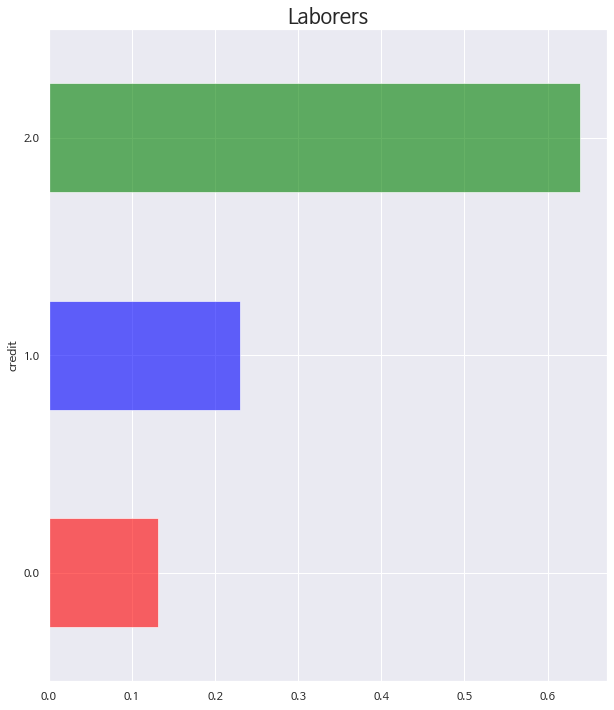

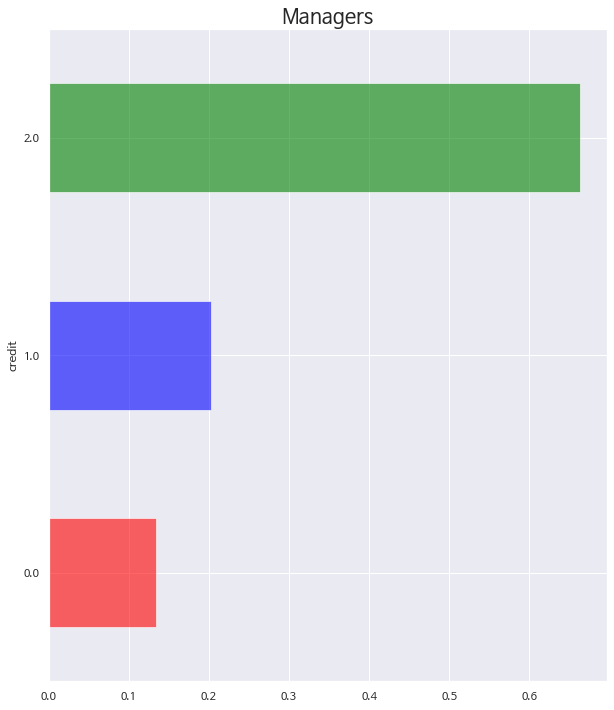

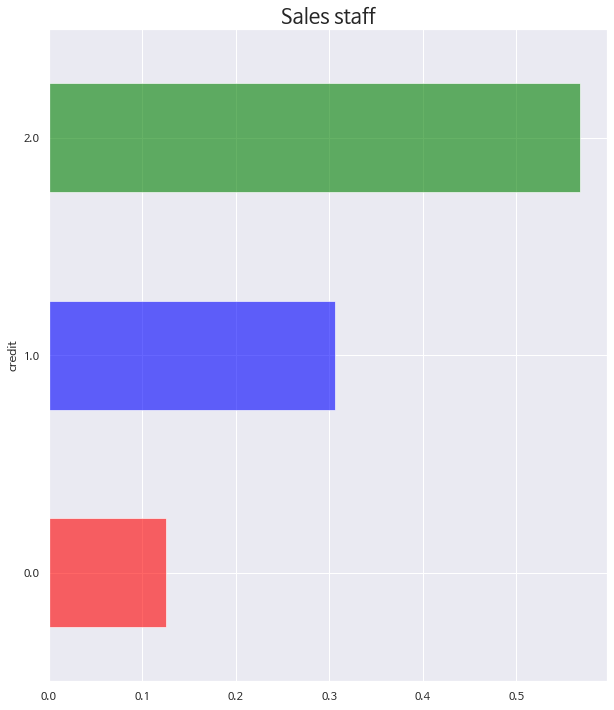

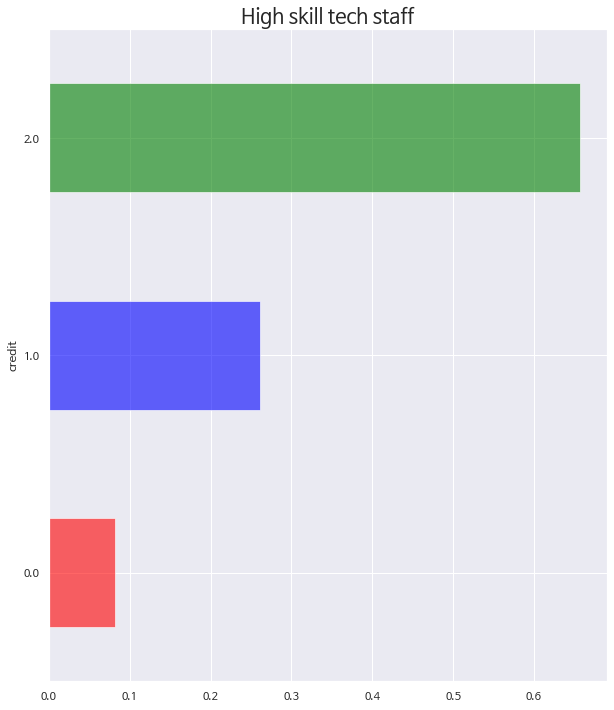

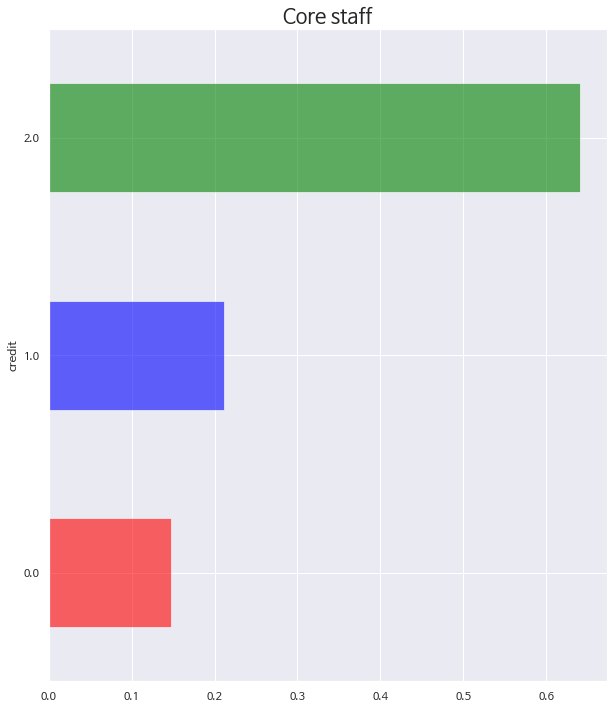

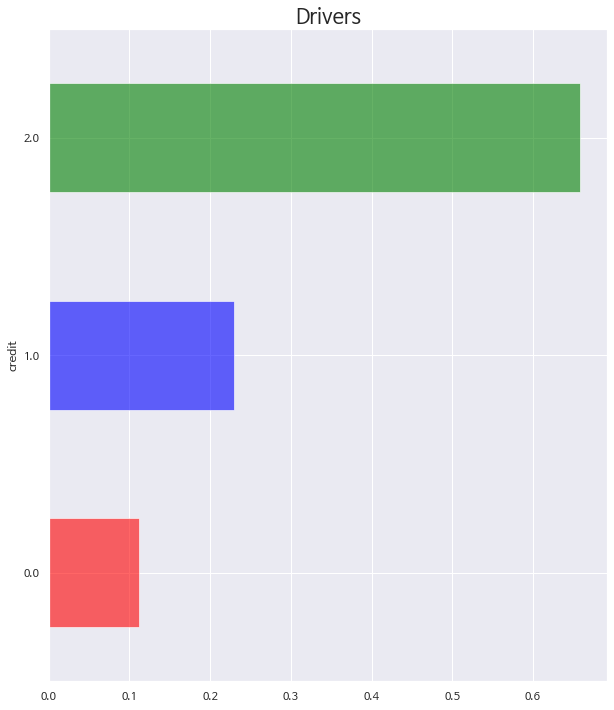

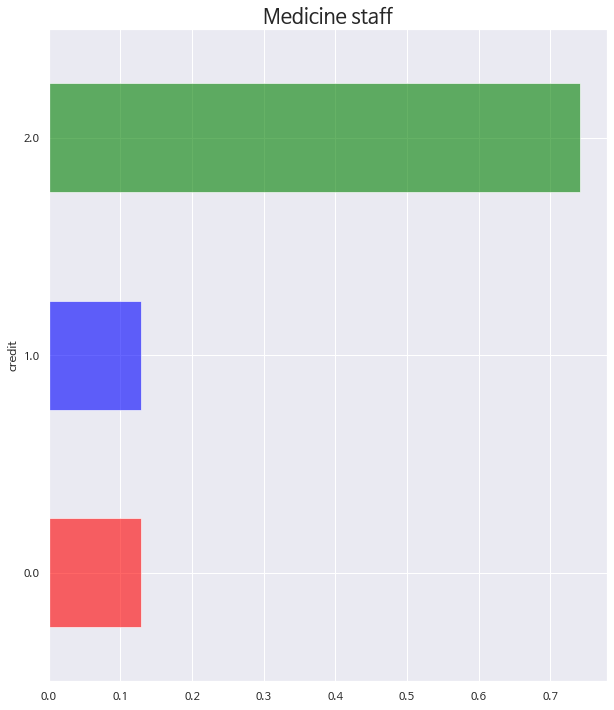

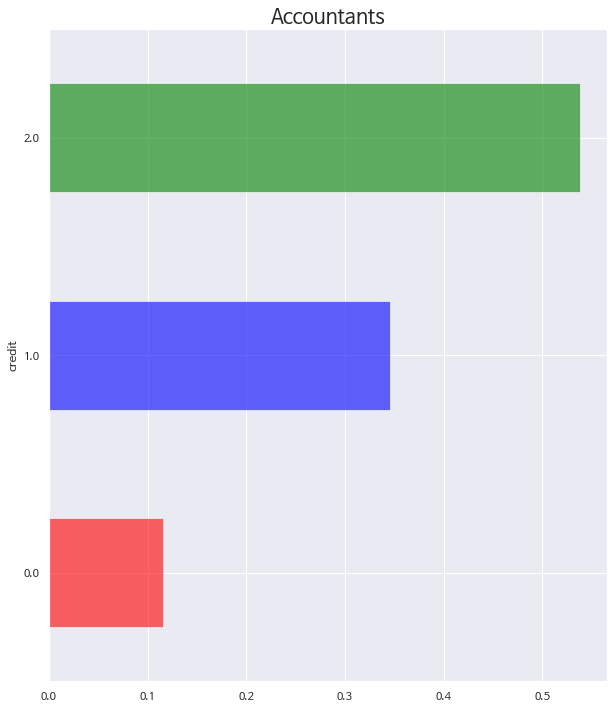

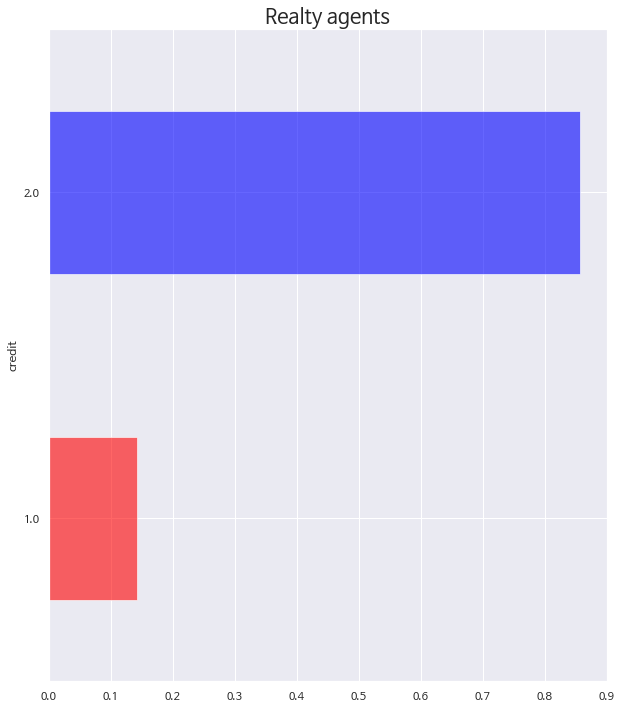

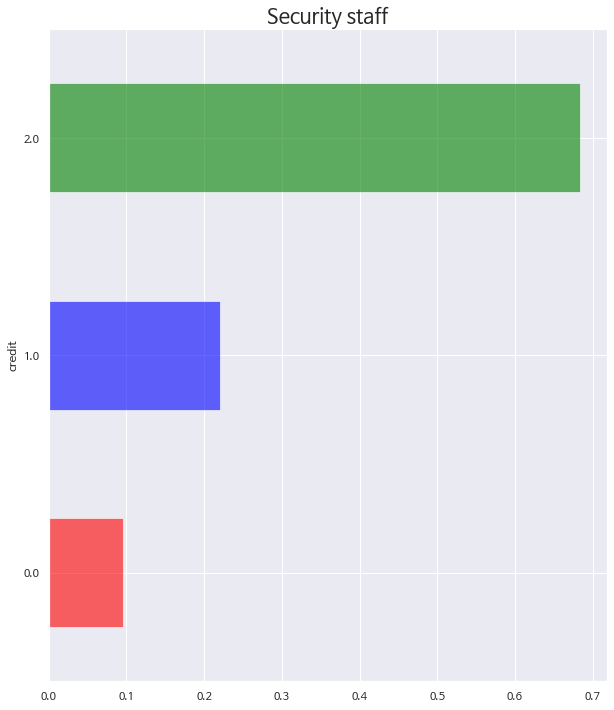

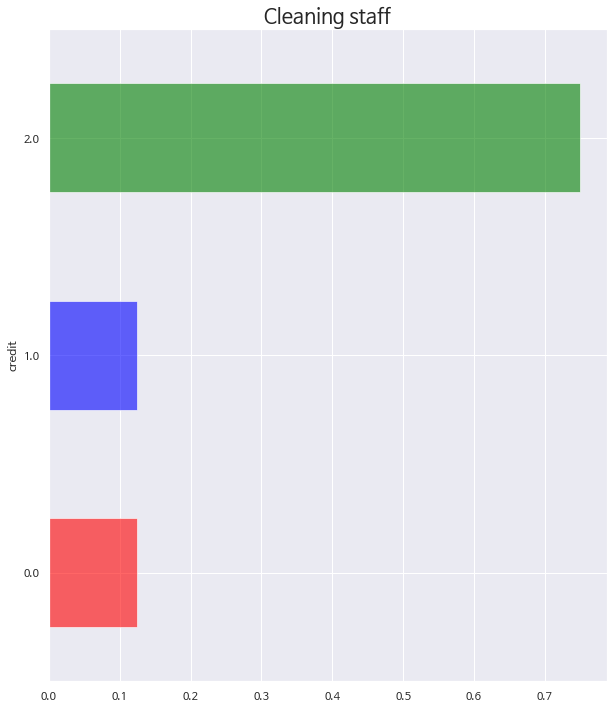

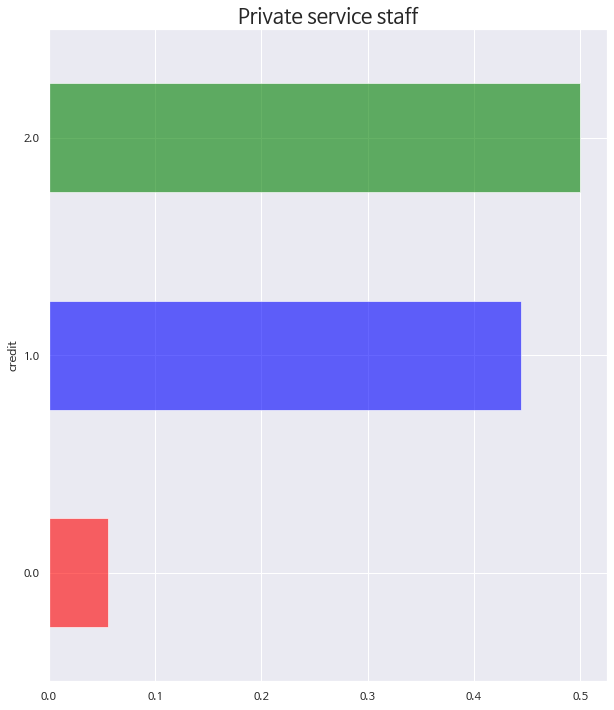

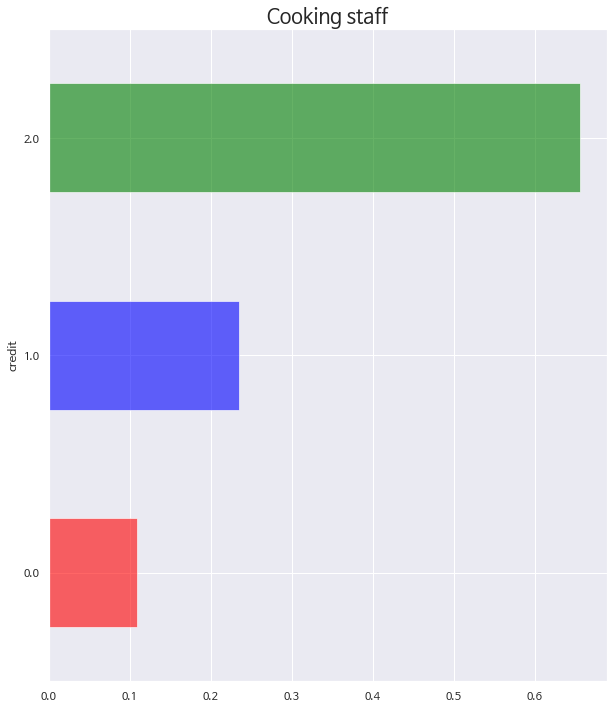

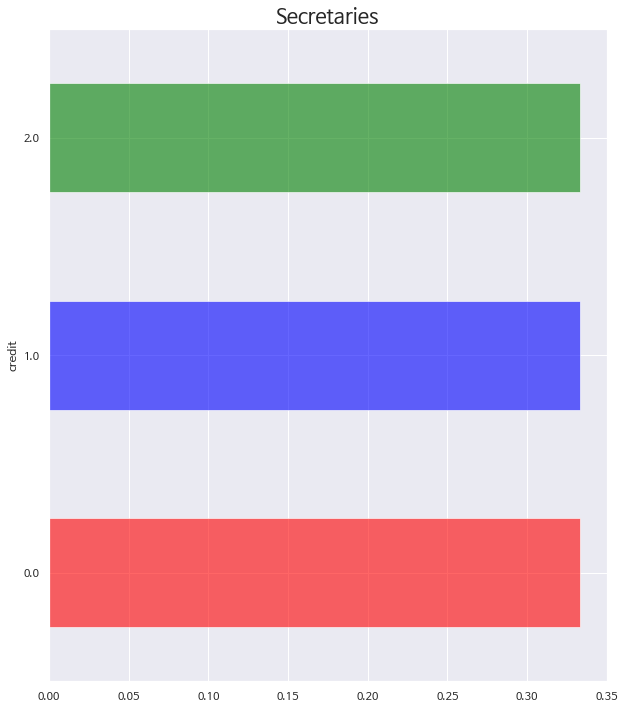

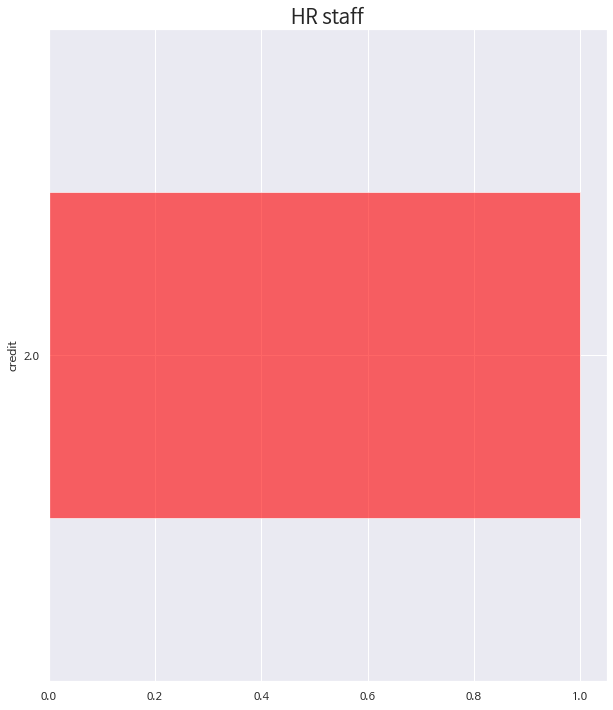

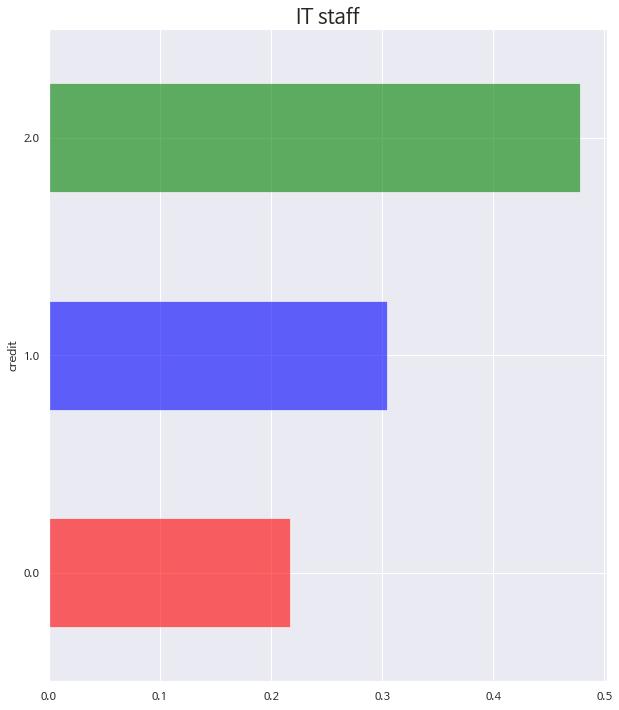

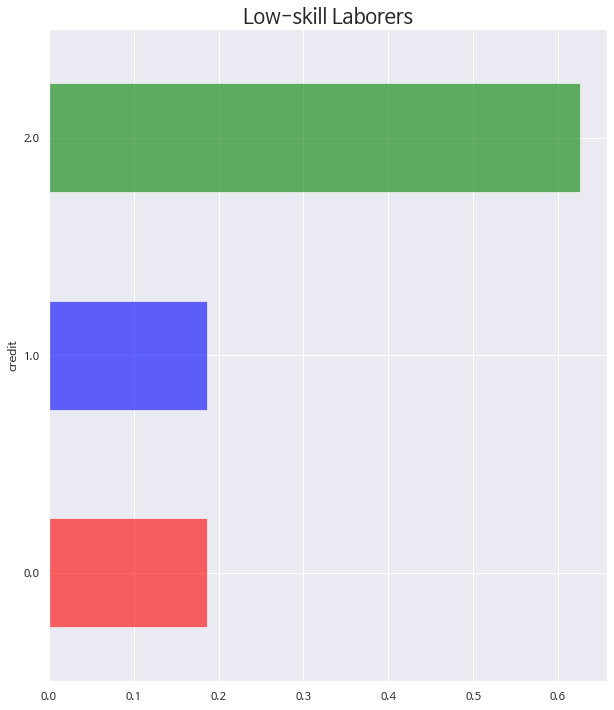

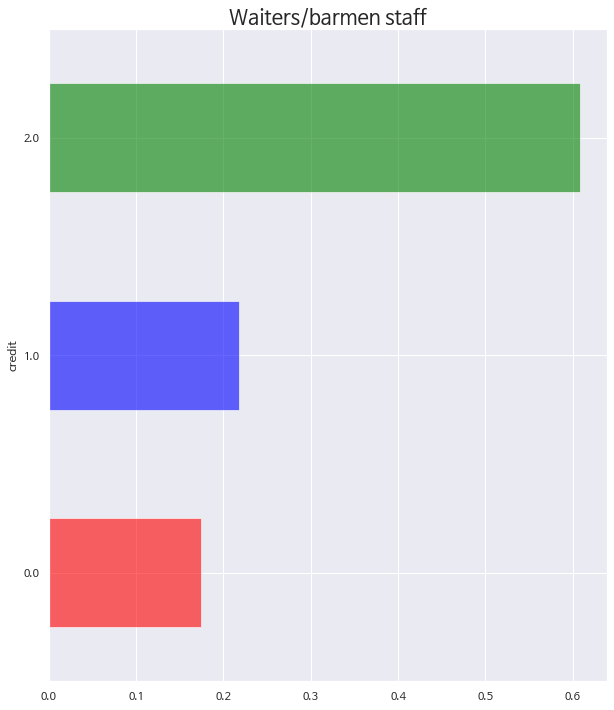

In [ ]:
# 남성의 직업별 신용등급 비율
man_zero_credit = []
man_first_credit = []
man_second_credit = []
for occupation in train['occyp_type'].unique()[1:]:
  total = man_credit.loc[occupation]['man_credit'].sum()
  ratio_per_occupation = man_credit.loc[occupation]['man_credit'] / total
  if occupation == 'Realty agents':
    man_first_credit.append(ratio_per_occupation.iloc[0])
    man_second_credit.append(ratio_per_occupation.iloc[1])
  elif occupation == 'HR staff':
    man_first_credit.append(ratio_per_occupation.iloc[0])
  else: 
    man_zero_credit.append(ratio_per_occupation.iloc[0])
    man_first_credit.append(ratio_per_occupation.iloc[1])
    man_second_credit.append(ratio_per_occupation.iloc[2])

  ratio_per_occupation.plot(kind='barh', alpha=0.6, color=['red','blue','green'], stacked=True)
  plt.title(occupation, fontsize=20)
  plt.show()

In [ ]:
print('남성의 직업별 0등급 평균 비율:', np.mean(man_zero_credit).round(2))
print('남성의 직업별 1등급 평균 비율:',np.mean(man_first_credit).round(2))
print('남성의 직업별 2등급 평균 비율:',np.mean(man_second_credit).round(2))
# 여기서 비율은 해당 직종이 전체 직종에서 차지하는 비율을 뜻한다.

남성의 직업별 0등급 평균 비율: 0.14
남성의 직업별 1등급 평균 비율: 0.28
남성의 직업별 2등급 평균 비율: 0.62


In [ ]:
over_mean_man_occupation = []
for occupation in train['occyp_type'].unique()[1:]:
  total = man_credit.loc[occupation]['man_credit'].sum()
  ratio_per_occupation = man_credit.loc[occupation]['man_credit'] / total
  if (occupation != 'Realty agents') and (occupation != 'HR staff'):
    if (ratio_per_occupation.iloc[0] + ratio_per_occupation.iloc[1]) > (np.mean(man_zero_credit).round(2) + np.mean(man_first_credit).round(2)):
      over_mean_man_occupation.append(occupation)

credit
0.0    0.128232
1.0    0.253826
2.0    0.617942
Name: woman_credit, dtype: float64


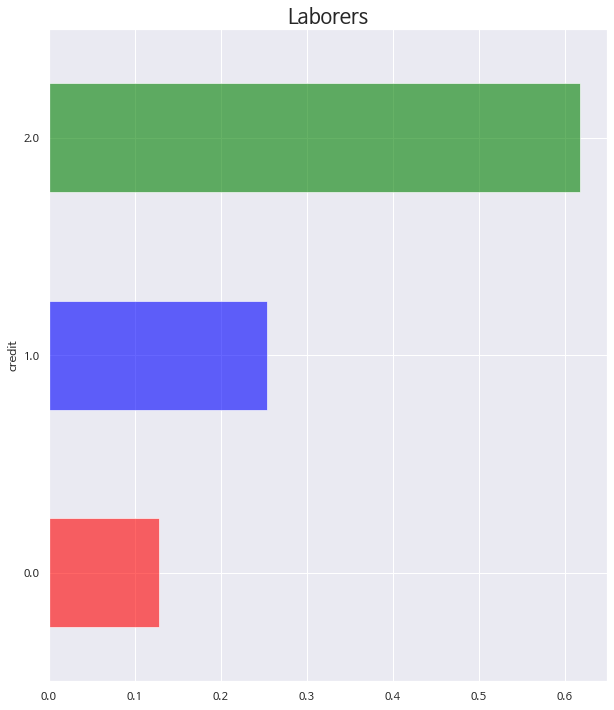

credit
0.0    0.125442
1.0    0.219081
2.0    0.655477
Name: woman_credit, dtype: float64


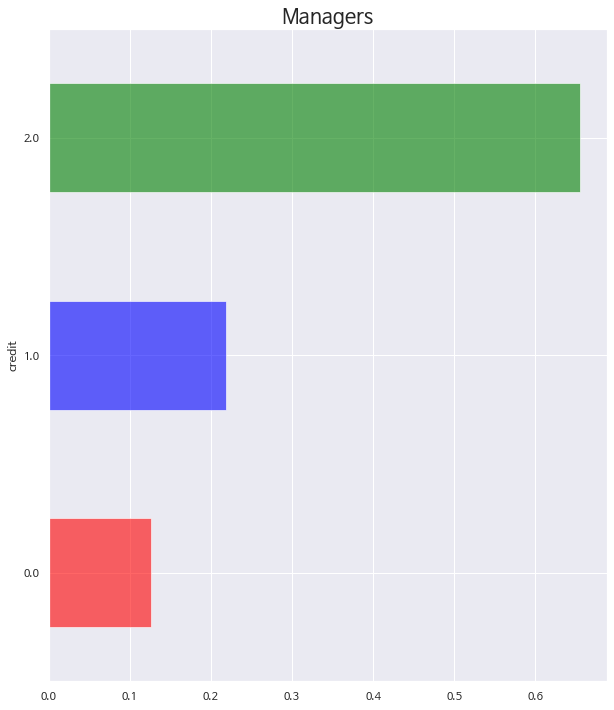

credit
0.0    0.113843
1.0    0.248179
2.0    0.637978
Name: woman_credit, dtype: float64


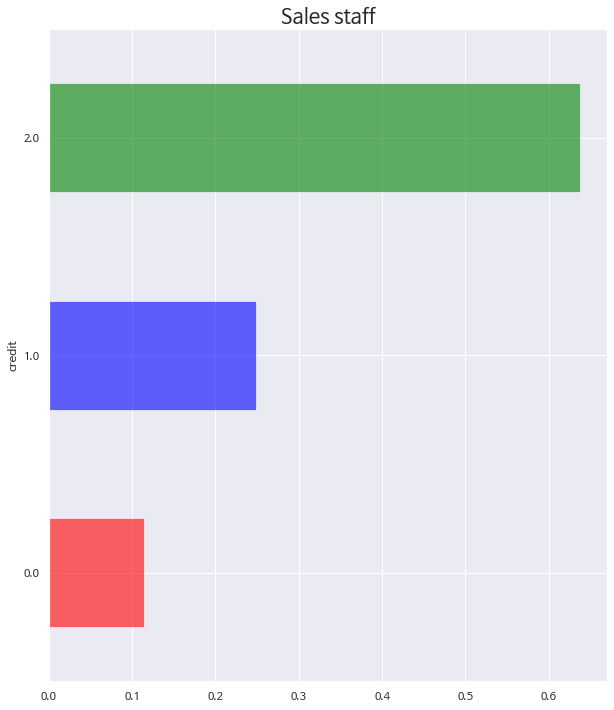

credit
0.0    0.134349
1.0    0.259003
2.0    0.606648
Name: woman_credit, dtype: float64


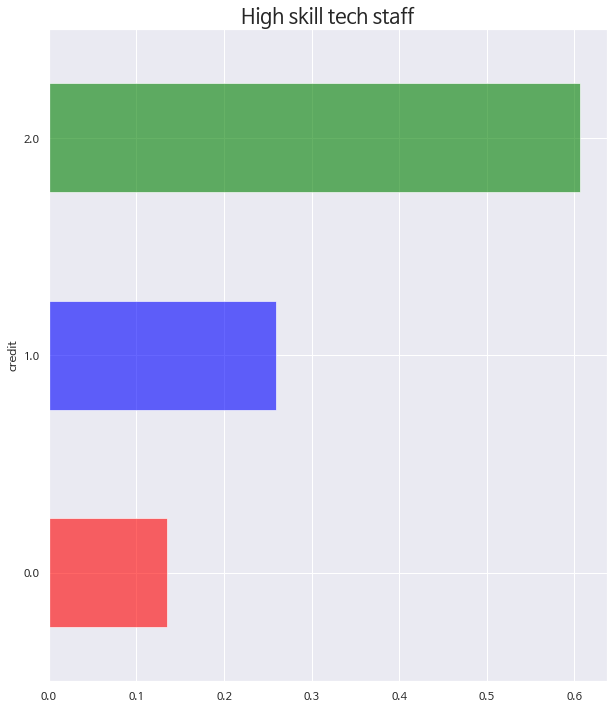

credit
0.0    0.127238
1.0    0.240811
2.0    0.631951
Name: woman_credit, dtype: float64


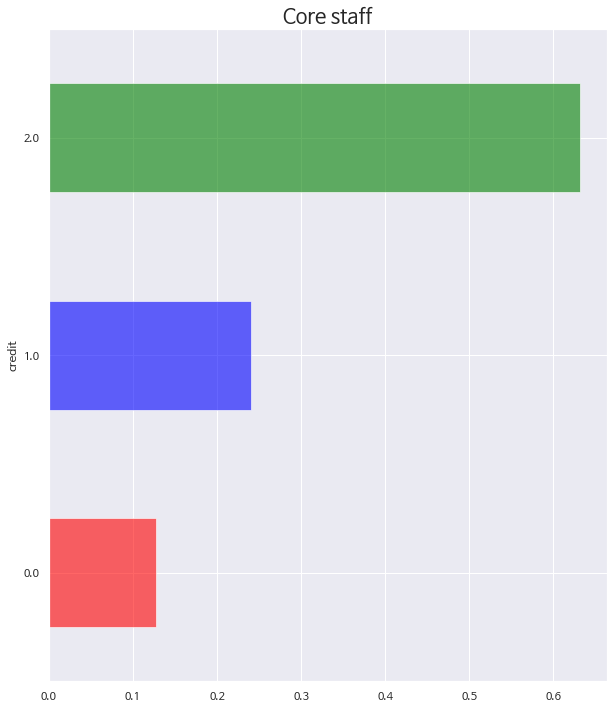

credit
0.0    0.227723
1.0    0.188119
2.0    0.584158
Name: woman_credit, dtype: float64


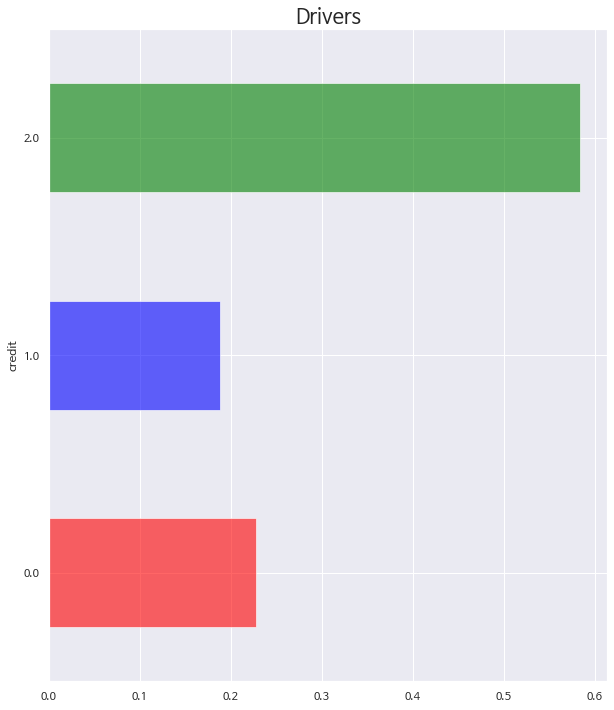

credit
0.0    0.094838
1.0    0.224490
2.0    0.680672
Name: woman_credit, dtype: float64


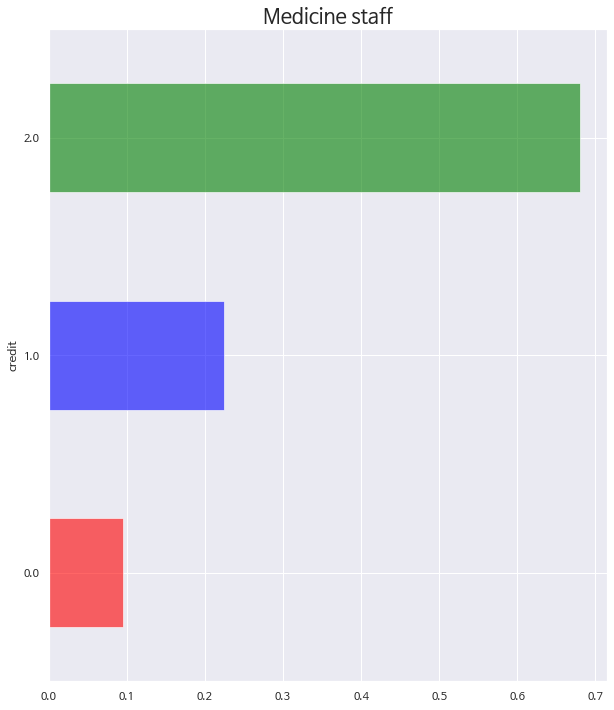

credit
0.0    0.131279
1.0    0.248858
2.0    0.619863
Name: woman_credit, dtype: float64


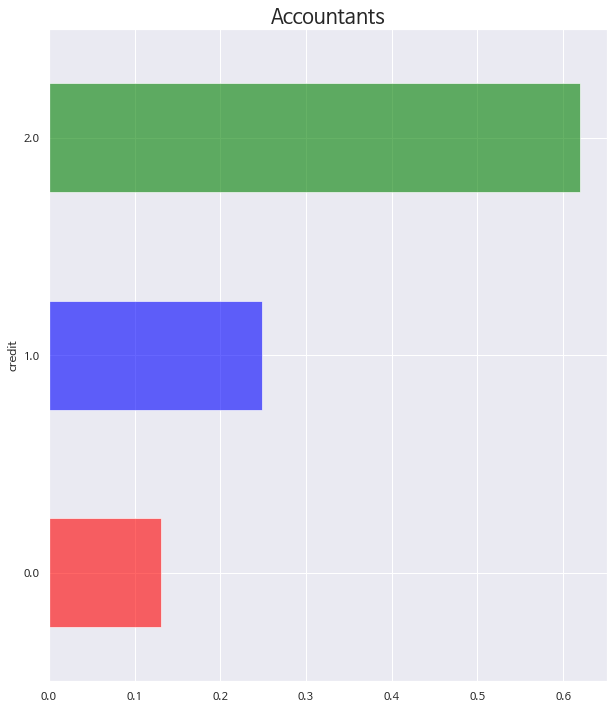

credit
0.0    0.178571
1.0    0.142857
2.0    0.678571
Name: woman_credit, dtype: float64


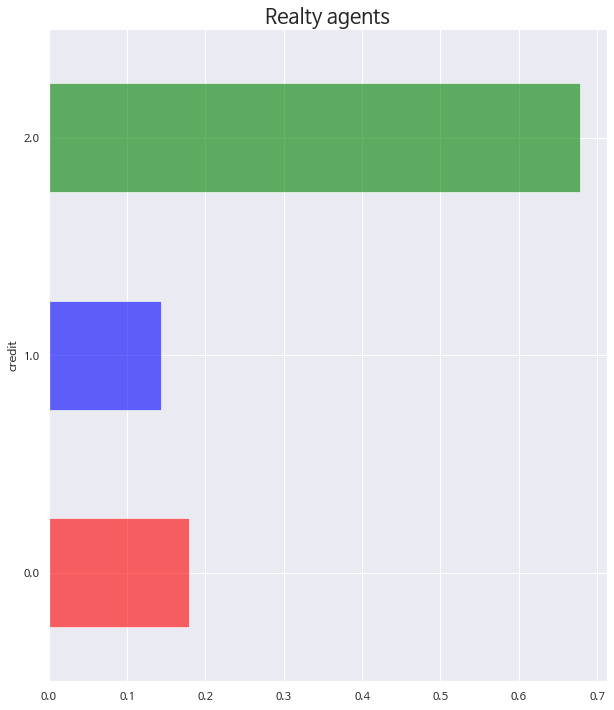

credit
0.0    0.083333
1.0    0.175000
2.0    0.741667
Name: woman_credit, dtype: float64


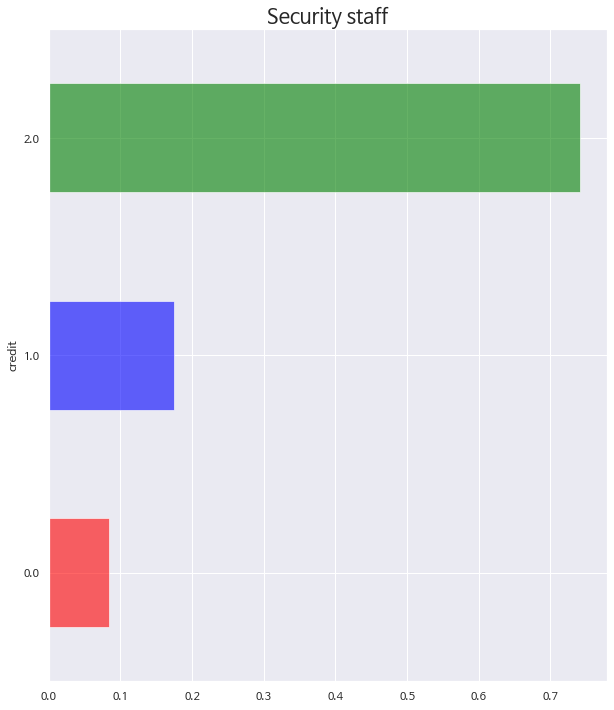

credit
0.0    0.098191
1.0    0.235142
2.0    0.666667
Name: woman_credit, dtype: float64


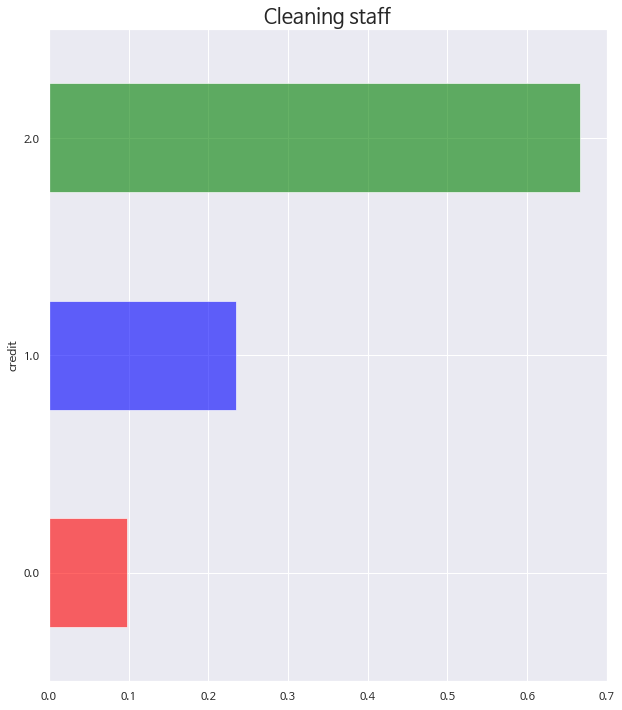

credit
0.0    0.151111
1.0    0.208889
2.0    0.640000
Name: woman_credit, dtype: float64


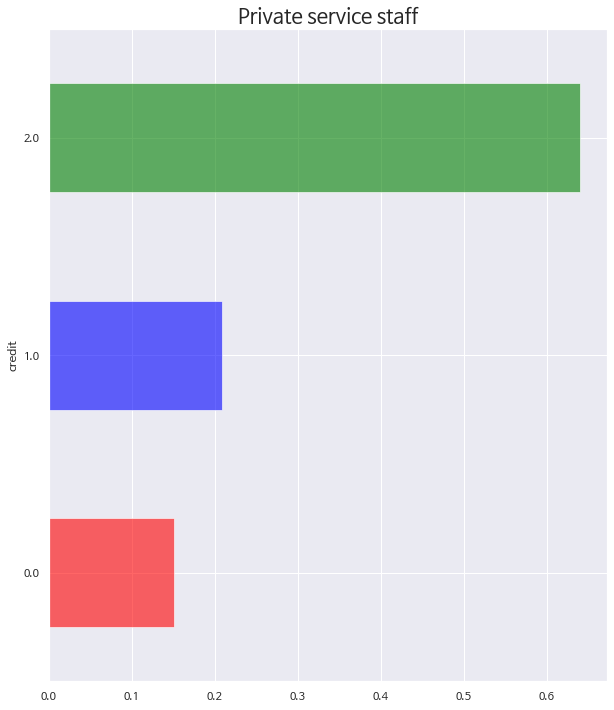

credit
0.0    0.129771
1.0    0.241730
2.0    0.628499
Name: woman_credit, dtype: float64


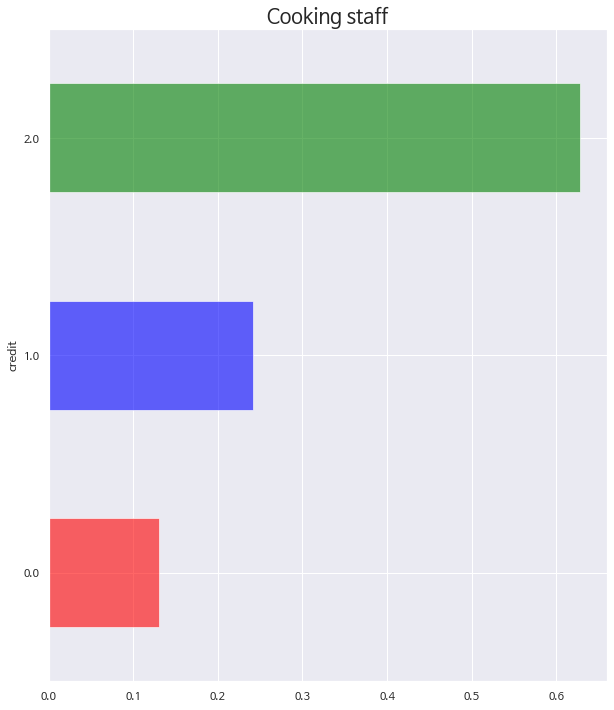

credit
0.0    0.085106
1.0    0.319149
2.0    0.595745
Name: woman_credit, dtype: float64


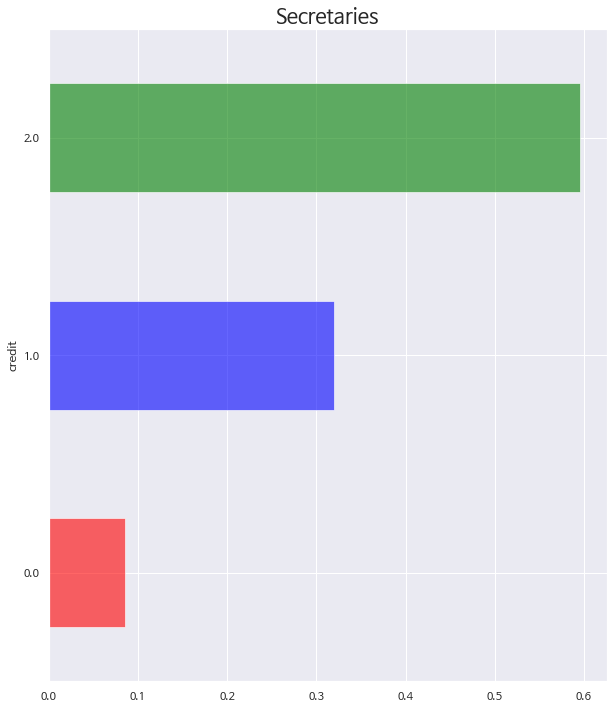

credit
0.0    0.122807
1.0    0.070175
2.0    0.807018
Name: woman_credit, dtype: float64


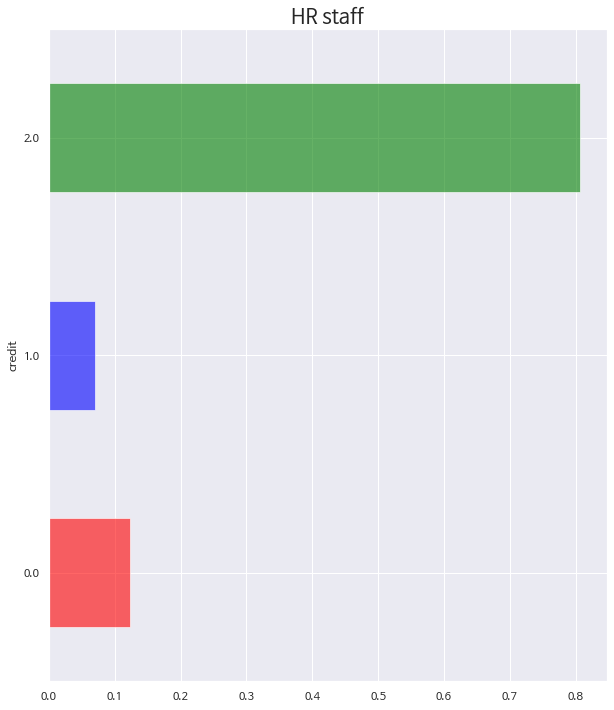

credit
0.0    0.166667
1.0    0.166667
2.0    0.666667
Name: woman_credit, dtype: float64


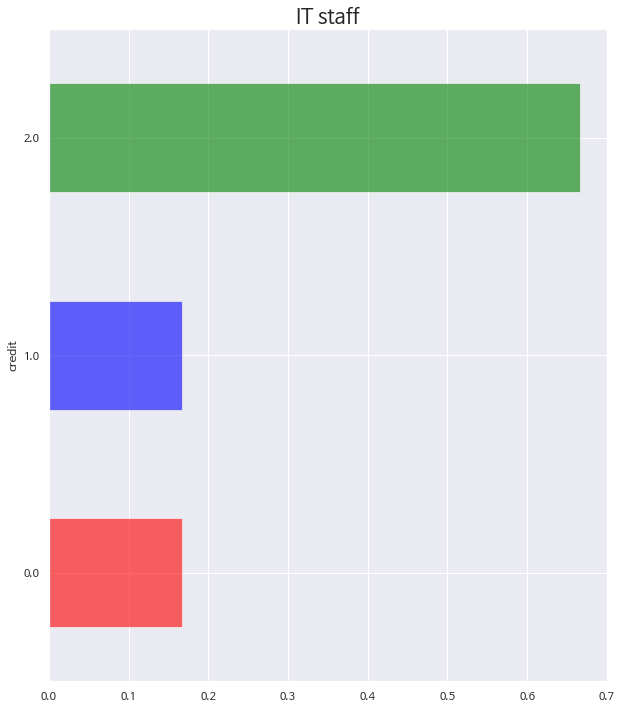

credit
0.0    0.10
1.0    0.05
2.0    0.85
Name: woman_credit, dtype: float64


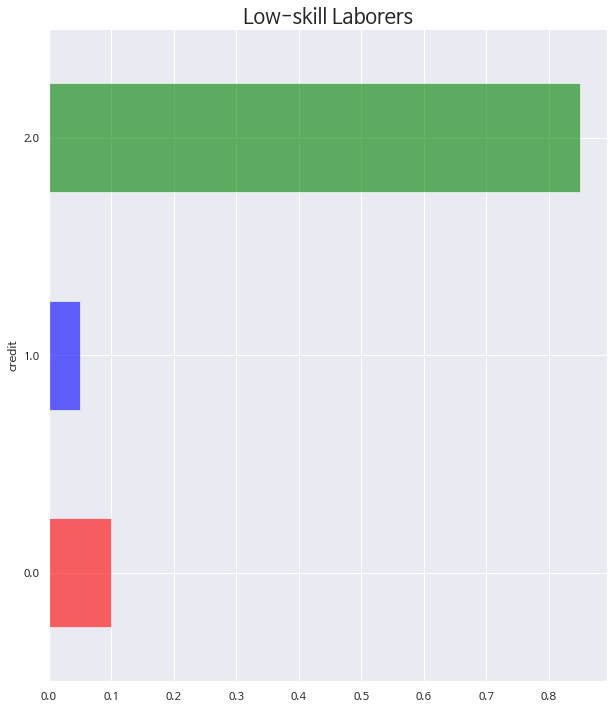

credit
0.0    0.059406
1.0    0.445545
2.0    0.495050
Name: woman_credit, dtype: float64


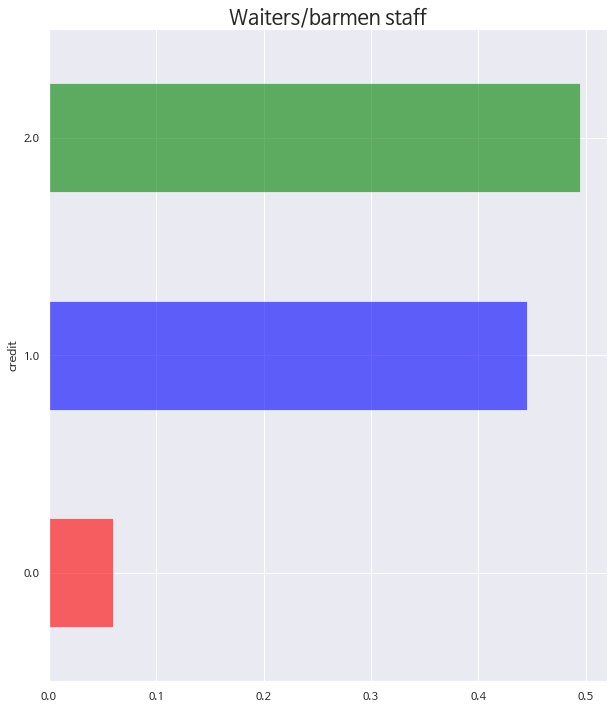

In [ ]:
# 여성 직업별 신용등급 비율
woman_zero_credit = []
woman_first_credit = []
woman_second_credit = []
for occupation in train['occyp_type'].unique()[1:]:
  total = woman_credit.loc[occupation]['woman_credit'].sum()
  ratio_per_occupation = woman_credit.loc[occupation]['woman_credit'] / total
  woman_zero_credit.append(ratio_per_occupation.iloc[0])
  woman_first_credit.append(ratio_per_occupation.iloc[1])
  woman_second_credit.append(ratio_per_occupation.iloc[2])
  print(ratio_per_occupation)
  
  ratio_per_occupation.plot(kind='barh', alpha=0.6, color=['red','blue','green'], stacked=True)
  plt.title(occupation, fontsize=20)
  plt.show()

In [ ]:
print('여성의 직업별 0등급 평균 비율:', np.mean(woman_zero_credit).round(2))
print('여성의 직업별 1등급 평균 비율:',np.mean(woman_first_credit).round(2))
print('여성의 직업별 2등급 평균 비율:',np.mean(woman_second_credit).round(2))
# 여기서 비율은 해당 직종이 전체 직종에서 차지하는 비율을 뜻한다.

여성의 직업별 0등급 평균 비율: 0.13
여성의 직업별 1등급 평균 비율: 0.22
여성의 직업별 2등급 평균 비율: 0.66


In [ ]:
over_mean_woman_occupation = []
for occupation in train['occyp_type'].unique()[1:]:
  total = woman_credit.loc[occupation]['woman_credit'].sum()
  ratio_per_occupation = woman_credit.loc[occupation]['woman_credit'] / total
  if (ratio_per_occupation.iloc[0] + ratio_per_occupation.iloc[1]) > (np.mean(woman_zero_credit).round(2) + np.mean(woman_first_credit).round(2)):
    over_mean_woman_occupation.append(occupation)

In [ ]:
# 0 & 1 등급의 비율이 평균 값 이상으로 분포해 있는 직업들
print('남성의 신뢰성 있는 직업 리스트:', over_mean_man_occupation)
# 0 & 1 등급의 비율이 평균 값 이상으로 분포해 있는 직업들
print('여성의 신뢰성 있는 직업 리스트:', over_mean_woman_occupation)

print('직종에 따른 여성의 0,1등급의 평균 비율은 35%, 남성의 0,1등급 평균 비율은 42%로 직업에 따른 신용평가는 남성이 앞서고 있다.')

남성의 신뢰성 있는 직업 리스트: ['Sales staff', 'Accountants', 'Private service staff', 'Secretaries', 'IT staff']
여성의 신뢰성 있는 직업 리스트: ['Laborers', 'Sales staff', 'High skill tech staff', 'Core staff', 'Drivers', 'Accountants', 'Private service staff', 'Cooking staff', 'Secretaries', 'Waiters/barmen staff']
여성의 0,1등급의 평균 비율은 35%, 남성의 0,1등급 평균 비율은 42%로 직업에 따른 신용평가는 남성이 앞서고 있다.


### car: 차량 소유 여부에 따른 분석 

,credit
credit,
0.0,613
1.0,1219
2.0,3419


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


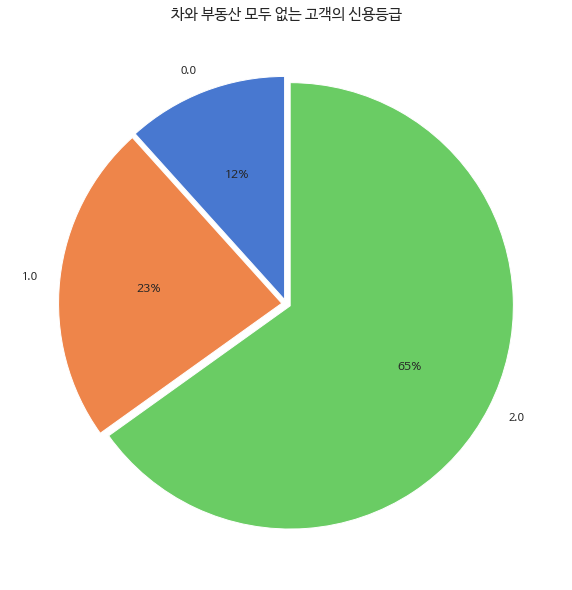

,credit
credit,
0.0,1369
1.0,2771
2.0,7019


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


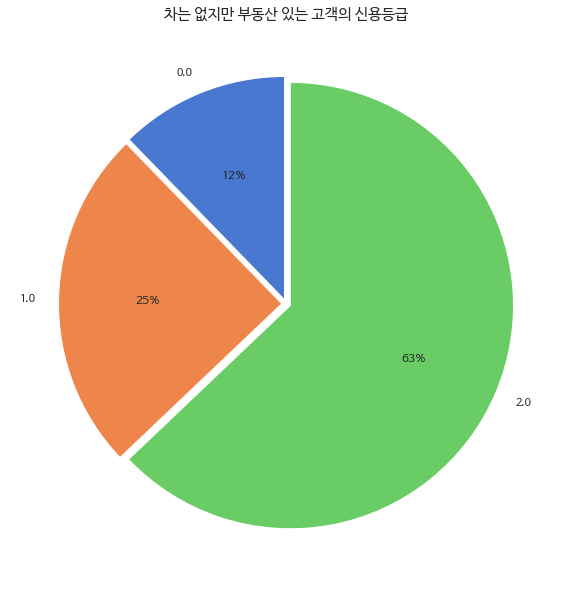

,credit
credit,
0.0,451
1.0,716
2.0,2209


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


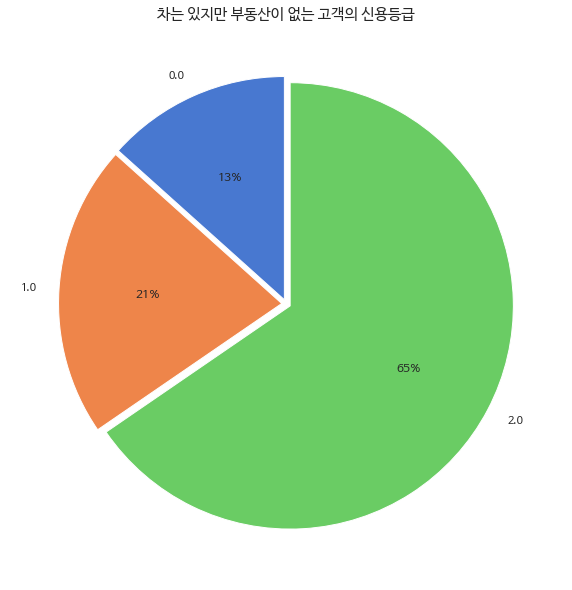

,credit
credit,
0.0,789
1.0,1561
2.0,4321


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


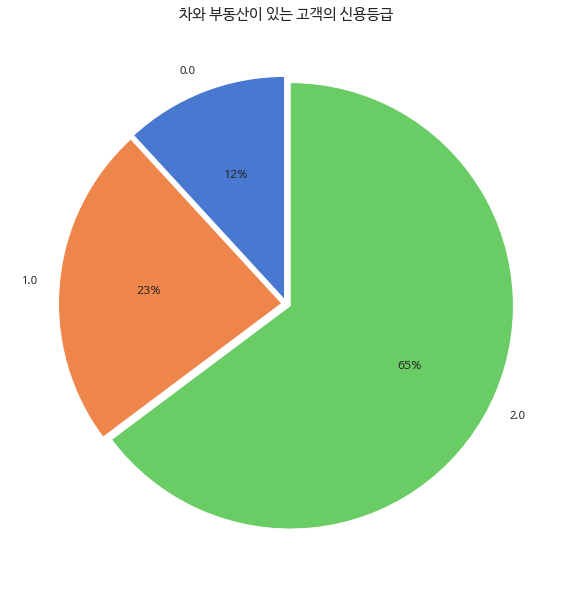


차는 없지만 부동산이 있는 고객의 신용등급: 0,1등급 비율 37%
부동산은 없지만 차는 있는 고객의 신용등급: 0,1등급 비율 34%
차와 부동산이 있는 고객의 신용등급: 0,1등급 비율 35%
차와 부동산이 없는 고객의 신용등급: 0,1등급 비율 35%

절대적 숫자는 차와 부동산이 있는 고객들의 2등급 수가 가장 적지만, 
비율로 환산한 결과 미미한 차이지만 안정성 있는 고객 그룹은 차는 없지만 부동산이 있는 고객으로 나타났다.


In [ ]:
# 차 소유 고객의 신용 등급은?
# 부동산 소유 고객의 신용 등급은?
# 차와 부동산 모두 소유한 고객의 신용 등급은?
# 둘 다 없는 고객의 신용등급은?
car_and_reality = pd.DataFrame(train.groupby(['car', 'reality', 'credit']).credit.count()) # 차, 부동산, 신용등급별로 그룹화하여 신용등급 고객 수 확인

display(car_and_reality.loc[0, 0]) # 차와 부동산 없음
no_car_no_reality = car_and_reality.loc[0, 0] 
total1 = sum(no_car_no_reality.values)
no_car_no_reality_ratio = no_car_no_reality / total1 

colors = sns.color_palette('muted')
explode = pd.Series([0.02, 0.02, 0.02], index = no_car_no_reality_ratio.index)
plt.pie(no_car_no_reality_ratio.values, labels = no_car_no_reality_ratio.index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('차와 부동산 모두 없는 고객의 신용등급', fontsize=15)
plt.show()
print()


display(car_and_reality.loc[0, 1]) # 차는 없지만 부동산 있음
no_car_yes_reality = car_and_reality.loc[0, 1]
total2 = sum(no_car_yes_reality.values)
no_car_yes_reality_ratio = no_car_yes_reality / total2

explode = pd.Series([0.02, 0.02, 0.02], index = no_car_yes_reality_ratio.index)
plt.pie(no_car_yes_reality_ratio.values, labels = no_car_yes_reality_ratio.index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('차는 없지만 부동산 있는 고객의 신용등급', fontsize=15)
plt.show()
print()


display(car_and_reality.loc[1, 0]) # 차는 있지만 부동산 없음
yes_car_no_reality = car_and_reality.loc[1, 0]
total3 = sum(yes_car_no_reality.values)
yes_car_no_reality_ratio = yes_car_no_reality / total3 

explode = pd.Series([0.02, 0.02, 0.02], index = yes_car_no_reality_ratio.index)
plt.pie(yes_car_no_reality_ratio.values, labels = yes_car_no_reality_ratio.index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('차는 있지만 부동산이 없는 고객의 신용등급', fontsize=15)
plt.show()
print()


display(car_and_reality.loc[1, 1]) # 차와 부동산 있음
yes_car_yes_reality = car_and_reality.loc[1, 1]
total4 = sum(yes_car_yes_reality.values)
yes_car_yes_reality_ratio = yes_car_yes_reality / total4 

explode = pd.Series([0.02, 0.02, 0.02], index = yes_car_yes_reality_ratio.index)
plt.pie(yes_car_yes_reality_ratio.values, labels = yes_car_yes_reality_ratio.index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
plt.title('차와 부동산이 있는 고객의 신용등급', fontsize=15)
plt.show()
print()

print('차는 없지만 부동산이 있는 고객의 신용등급: 0,1등급 비율 37%')
print('부동산은 없지만 차는 있는 고객의 신용등급: 0,1등급 비율 34%')
print('차와 부동산이 있는 고객의 신용등급: 0,1등급 비율 35%')
print('차와 부동산이 없는 고객의 신용등급: 0,1등급 비율 35%')
print()
print('절대적 숫자는 차와 부동산이 있는 고객들의 2등급 수가 가장 적지만, \n비율로 환산한 결과 미미한 차이지만 안정성 있는 고객 그룹은 차는 없지만 부동산이 있는 고객으로 나타났다.')

In [ ]:
# 근무 연차가 5년 이내인 사람들의 특징
condition = (train['DAYS_EMPLOYED'] <= 5)
temp = train.loc[condition, ['car', 'reality', 'income_total', 'family_type']]
print(temp.shape)
temp.head()

# train.groupby(['car')

(15551, 4)


,car,reality,income_total,family_type
1,0,1,24.75,Civil marriage
6,0,0,31.50,Separated
8,1,1,18.00,Married
9,0,1,10.35,Married
11,1,1,13.50,Married


In [ ]:
# 신용 0등급 + 근무 연차가 5년 이내 + 소득 수준 평균
condition = (train['DAYS_EMPLOYED'] <= 5) & (train['credit'] == 0.0)
temp = train.loc[condition, ['car', 'reality', 'income_total', 'family_type']]
print(temp.shape)
temp.head()
print(temp['income_total'].sum())
print(temp['income_total'].mean())

(1879, 4)
34381.498049999995
18.29776373070782


car
0      0.651943
1      0.348057
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


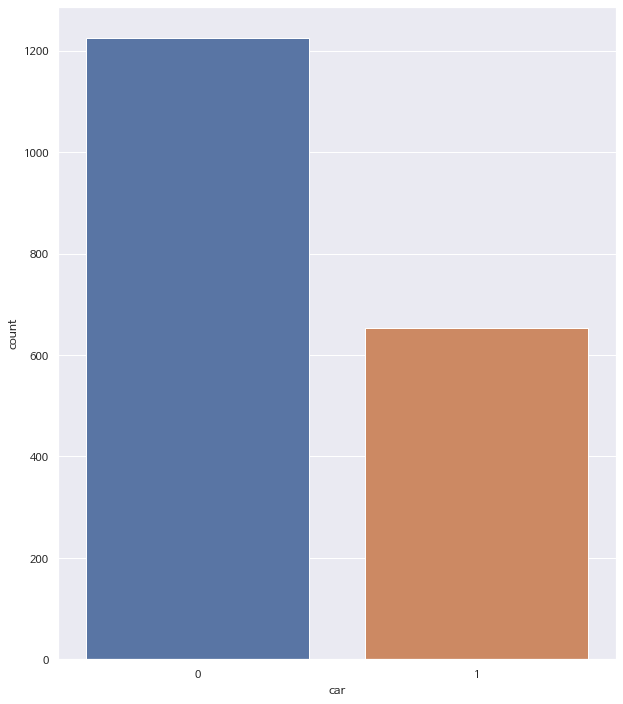

In [ ]:
# 신용 0등급 + 근무 연차 5년 이내 고객 특징
# 차 소유 현황
print(pd.DataFrame(temp['car']).value_counts(normalize=True))
sns.countplot(temp['car'])

reality
1          0.679085
0          0.320915
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


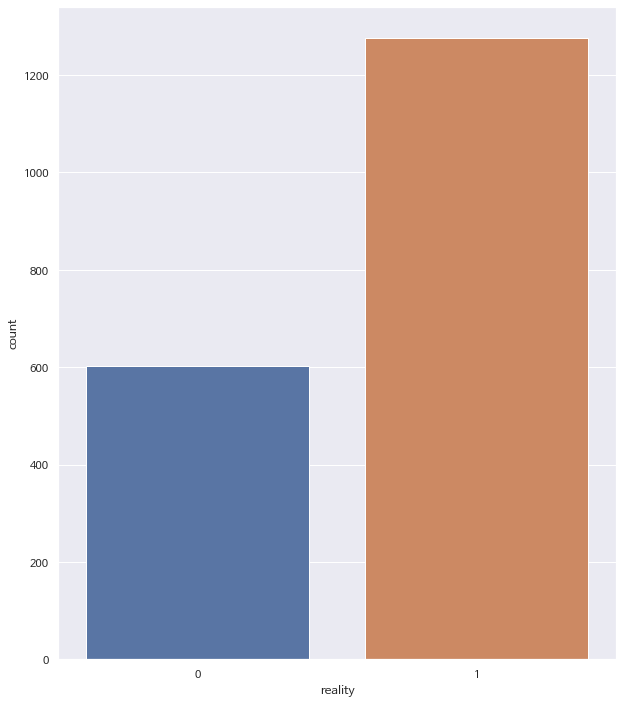

In [ ]:
# 신용 0등급 + 근무 연차 5년 이내 고객 특징
# 부동산 소유 현황
print(pd.DataFrame(temp['reality']).value_counts(normalize=True))
sns.countplot(temp['reality'])

In [ ]:
# 신용 0등급 + 근무 연차5년 이내 + 차 & 부동산 소유
condition = (train['DAYS_EMPLOYED'] <= 5) & (train['credit'] == 0.0) & (train['car'] == 1) & (train['reality'] == 1)
temp2 = train.loc[condition, ['car', 'reality', 'income_total', 'family_type']]
print(temp2.shape)

result = (427 / 1879)
print('2등급 중에서 근무 연차5년 이하 + 차&부동산 소유 고객 비율')
print(f'{round(result, 2) * 100}%')

(427, 4)
2등급 중에서 근무 연차5년 이하 + 차&부동산 소유 고객 비율
23.0%


In [ ]:
# 신용 2등급 + 근무 연차5년 이내 + 차 & 부동산 소유
condition = (train['DAYS_EMPLOYED'] <= 5) & (train['credit'] == 2.0) & (train['car'] == 1) & (train['reality'] == 1)
temp2 = train.loc[condition, ['car', 'reality', 'income_total', 'family_type']]
print(temp2.shape)

result = (2482 / 16968)
print('2등급 중에서 근무 연차5년 이하 + 차&부동산 소유 고객 비율')
print(f'{round(result, 2) * 100}%')

(2482, 4)
2등급 중에서 근무 연차5년 이하 + 차&부동산 소유 고객 비율
15.0%


In [ ]:
# 신용 0등급 중 기혼자인 고객들의 근무 연차 분포는? ( 그 중 5년 이내의 비율이 52% )
condition = (train['credit'] == 0.0) & (train['family_type'] == 'Married')
temp0 = train.loc[condition, ['family_type', 'DAYS_EMPLOYED']]
temp0['DAYS_EMPLOYED'].value_counts(normalize=True).sort_index()

0     0.175328
1     0.083597
2     0.076819
3     0.089019
4     0.060099
5     0.065522
6     0.075915
7     0.065974
8     0.038409
9     0.056484
10    0.122910
15    0.041573
20    0.025305
25    0.018527
30    0.002711
35    0.000452
40    0.001356
Name: DAYS_EMPLOYED, dtype: float64

### reality: 부동산 소유 여부에 따른 분석

### child_num: 자녀 수에 따른 분석

In [ ]:
train.groupby('child_num')

### income_total: 연간 소득에 따른 분석

In [ ]:
# 평균 소득 수준
# 0등급 + 근무 연차5년 이하 => 평균 소득확인, 평균 연령대 확인
condition = (train['DAYS_EMPLOYED'] <= 5) & (train['credit'] == 0.0) 
temp = train.loc[condition, ['car', 'reality', 'income_total', 'family_type', 'DAYS_BIRTH']]
print(temp['income_total'].mean() * 10000)
print()
# temp['DAYS_BIRTH']
temp[['DAYS_BIRTH']].describe()

182977.6373070782



,DAYS_BIRTH
count,1879.000000
mean,39.909526
std,13.269642
min,20.000000
25%,30.000000
50%,40.000000
75%,50.000000
max,60.000000


In [ ]:
# 평균 소득 수준
# 2등급 + 근무 연차5년 이하 => 평균 소득확인, 평균 연령대 확인
condition = (train['DAYS_EMPLOYED'] <= 5) & (train['credit'] == 2.0) 
temp = train.loc[condition, ['car', 'reality', 'income_total', 'family_type', 'DAYS_BIRTH']]
print(temp['income_total'].mean() * 10000)
print()
# temp['DAYS_BIRTH']
temp[['DAYS_BIRTH']].describe()

180320.0891275578



,DAYS_BIRTH
count,9823.000000
mean,40.132342
std,13.287801
min,20.000000
25%,30.000000
50%,40.000000
75%,50.000000
max,60.000000


### income_type: 소득 분류에 따른 분석

In [ ]:
# >>> 소득액과 신용등급이 무관한 것을 확인. 
train.groupby('income_type')

### edu_type: 교육 수준에 따른 분석

credit  edu_type
0.0     1              28
        2            2169
        3             114
        4             909
        5               2
1.0     1              59
        2            4204
        3             246
        4            1751
        5               7
2.0     1             170
        2           11622
        3             660
        4            4502
        5              14
Name: credit, dtype: int64



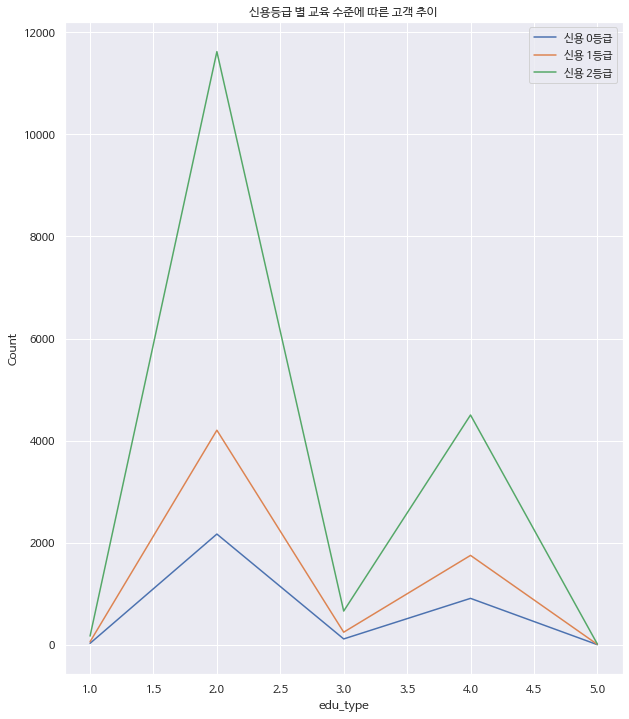

신용등급으로 구분한 뒤 교육수준 그룹화한 결과 신용등급 별 비율적 차이가 동일한 것을 확인 => 교욱 수준에 따른 신용 등급 차이는 뚜렷하지 않다.


In [ ]:
print(train.groupby(['credit','edu_type']).credit.count())
print()
sns.lineplot(data=train.groupby(['credit','edu_type']).credit.count()[0])
sns.lineplot(data=train.groupby(['credit','edu_type']).credit.count()[1])
sns.lineplot(data=train.groupby(['credit','edu_type']).credit.count()[2])
plt.legend(labels = ['신용 0등급','신용 1등급','신용 2등급'])
plt.title('신용등급 별 교육 수준에 따른 고객 추이')
plt.ylabel('Count')
plt.show()
# sns.barplot(x="edu_type", y="", data=train.groupby(['credit','edu_type']).credit.count())
print('신용등급으로 구분한 뒤 교육수준 그룹화한 결과 신용등급 별 비율적 차이가 동일한 것을 확인 => 교욱 수준에 따른 신용 등급 차이는 뚜렷하지 않다.')

### family_type: 결혼 여부에 따른 분석

In [ ]:
# 신용 등급 별 가족 유형 비율
condition = (train['credit'] == 0.0) 
temp = train.loc[condition, ['car', 'reality', 'income_total', 'family_type', 'DAYS_BIRTH']]
print(temp[['family_type']].value_counts(normalize=True))
condition = (train['credit'] == 2.0) 
temp = train.loc[condition, ['car', 'reality', 'income_total', 'family_type', 'DAYS_BIRTH']]
print(temp[['family_type']].value_counts(normalize=True))

family_type         
Married                 0.686840
Single / not married    0.124767
Civil marriage          0.089385
Separated               0.059901
Widow                   0.039106
dtype: float64
family_type         
Married                 0.697961
Single / not married    0.126945
Civil marriage          0.076379
Separated               0.058758
Widow                   0.039958
dtype: float64


In [ ]:
# 신용 등급 별 가족 유형 수
print(train.groupby(['credit', 'family_type']).credit.count())

print('결혼 유무 또한 0등급과 2등급의 중요도가 동일하여 신용 등급 결정에 큰 영향을 미치는 요인에 해당되지 않음을 확인')
print()

print('추가적으로 대부분의 신용카드 이용자는 기혼자로 확인되어, 추후 금융 서비스 개발이나 금융 상품 기획 고려할 요소 판단됨')

credit  family_type         
0.0     Civil marriage            288
        Married                  2213
        Separated                 193
        Single / not married      402
        Widow                     126
1.0     Civil marriage            539
        Married                  4140
        Separated                 349
        Single / not married      940
        Widow                     299
2.0     Civil marriage           1296
        Married                 11843
        Separated                 997
        Single / not married     2154
        Widow                     678
Name: credit, dtype: int64
결혼 유무 또한 0등급과 2등급의 중요도가 동일하여 신용 등급 결정에 큰 영향을 미치는 요인에 해당되지 않음을 확인

추가적으로 대부분의 신용카드 이용자는 기혼자로 확인되어, 추후 금융 서비스 개발이나 금융 상품 기획 고려할 요소 판단됨


In [ ]:
# 결혼 유무
# 신용 0등급 + 근무 연차 5년이내 + 가족 유형
condition = (train['DAYS_EMPLOYED'] <= 5) & (train['credit'] == 0.0) 
temp = train.loc[condition, ['car', 'reality', 'income_total', 'family_type', 'DAYS_BIRTH']]
temp['family_type'].value_counts(normalize=True)

Married                 0.648217
Single / not married    0.143161
Civil marriage          0.096328
Separated               0.059074
Widow                   0.053220
Name: family_type, dtype: float64

In [ ]:
# 결혼 유무
# 신용 2등급 + 근무 연차 5년이내 + 가족 유형
condition = (train['DAYS_EMPLOYED'] <= 5) & (train['credit'] == 2.0) 
temp = train.loc[condition, ['car', 'reality', 'income_total', 'family_type', 'DAYS_BIRTH']]
temp['family_type'].value_counts(normalize=True)

Married                 0.671078
Single / not married    0.140385
Civil marriage          0.078896
Separated               0.058536
Widow                   0.051105
Name: family_type, dtype: float64

### house_type: 생활 방식에 따른 분석

In [ ]:
print(train.groupby(['house_type', 'credit']).credit.count())
print(train.groupby(['credit','house_type']).credit.count())

house_type           credit
Co-op apartment      0.0          14
                     1.0          30
                     2.0          66
House / apartment    0.0        2873
                     1.0        5569
                     2.0       15211
Municipal apartment  0.0         110
                     1.0         160
                     2.0         548
Office apartment     0.0          24
                     1.0          48
                     2.0         118
Rented apartment     0.0          50
                     1.0         147
                     2.0         232
With parents         0.0         151
                     1.0         313
                     2.0         793
Name: credit, dtype: int64
credit  house_type         
0.0     Co-op apartment           14
        House / apartment       2873
        Municipal apartment      110
        Office apartment          24
        Rented apartment          50
        With parents             151
1.0     Co-op apartment      

### DAYS_BIRTH: 출생일에 따른 분석

DAYS_BIRTH
20    357
30    989
40    823
50    695
60    358
Name: credit, dtype: int64
DAYS_BIRTH
20     956
30    1782
40    1523
50    1277
60     729
Name: credit, dtype: int64
DAYS_BIRTH
20    1971
30    4737
40    4543
50    3723
60    1994
Name: credit, dtype: int64


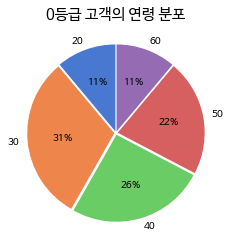

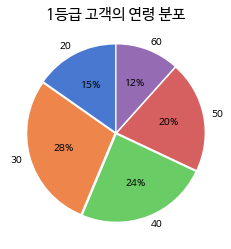

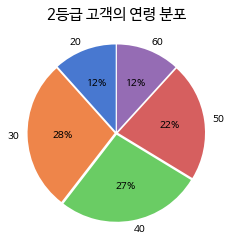

In [ ]:
# print(train.groupby(['credit','DAYS_BIRTH']).credit.count()) # 신용등급별 연령 분포 확인
years = train.groupby(['credit','DAYS_BIRTH']).credit.count()
years_zero = years.loc[0.0]
years_first = years.loc[1.0]
years_second = years.loc[2.0]
years_groups = [years_zero, years_first, years_second]
print(years_zero)
print(years_first)
print(years_second)
for i, years_group in enumerate(years_groups):
  colors = sns.color_palette('muted')
  explode = pd.Series([.02, .02, .02, .02, .02], index = years_group.index)
  plt.pie(years_group.values, labels = years_group.index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
  plt.title(f'{i}등급 고객의 연령 분포', fontsize=15)
  plt.show()
  print()

In [ ]:
print('모든 등급에서 연령대 분포는 동일한 비율로 관측')
print('신용카드 이용자는 30, 40대, 50대 순으로 많이 사용하고 있었고, 20대와 60대가 그 뒤를 잇고 있다.')
print('신용카드 이벤트를 기획할 때 30대, 40대, 50대의 특징을 반영하는 것을 우선순위로 두는 것이 효율적이지만, 20대와 60대 또한 전체 이용고객의 20%대를 가지고 있으므로 타겟에서 제외하지 않는 것이 좋을 듯 하다.')
print('모든 등급에서 30대가 가장 많은 신용카드 이용자가 분포하고 있었다. 시간이 지남에 따라 20대가 30대가 되므로 20대를 타겟으로 할 때는 신용카드 그 자체보다 신용카드 사의 인지도를 높이는 광고기획 및 이벤트를 진행하면 좋을 것으로 보인다.')

모든 등급에서 연령대 분포는 동일한 비율로 관측
신용카드 이용자는 30, 40대, 50대 순으로 많이 사용하고 있었고, 20대와 60대가 그 뒤를 잇고 있다.
신용카드 이벤트를 기획할 때 30대, 40대, 50대의 특징을 반영하는 것을 우선순위로 두는 것이 효율적이지만, 20대와 60대 또한 전체 이용고객의 20%대를 가지고 있으므로 타겟에서 제외하지 않는 것이 좋을 듯 하다.
모든 등급에서 30대가 가장 많은 신용카드 이용자가 분포하고 있었다. 시간이 지남에 따라 20대가 30대가 되므로 20대를 타겟으로 할 때는 신용카드 그 자체보다 신용카드 사의 인지도를 높이는 광고기획 및 이벤트를 진행하면 좋을 것으로 보인다.


In [ ]:
# 신용 등급 별 직종 확인 결과
condition1 = (train['DAYS_BIRTH'] == 20) & (train['credit'] == 0.0)
temp0 = train.loc[condition1, ['reality','car','occyp_type']]
print(temp0['occyp_type'].value_counts().index)

condition2 = (train['DAYS_BIRTH'] == 20) & (train['credit'] == 2.0)
temp2 = train.loc[condition2, ['reality','car','occyp_type']]
print(temp2['occyp_type'].value_counts().index)

temp0_set = set(list(temp0['occyp_type'].value_counts().index)) # 신용 0등급 + 20대인 직업 리스트 
temp2_set = set(list(temp2['occyp_type'].value_counts().index)) # 신용 2등급 + 20대인 직업 리스트

temp2_set - temp0_set # 신용 0등급에 없는 직업 리스트

Index(['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers',
       'Accountants', 'Cooking staff', 'High skill tech staff',
       'Medicine staff', 'Waiters/barmen staff', 'IT staff',
       'Private service staff', 'Realty agents', 'Security staff'],
      dtype='object')
Index(['Laborers', 'Core staff', 'Sales staff', 'Drivers', 'Managers',
       'Medicine staff', 'High skill tech staff', 'Accountants',
       'Cooking staff', 'Security staff', 'Waiters/barmen staff',
       'Private service staff', 'IT staff', 'Low-skill Laborers',
       'Realty agents', 'HR staff', 'Secretaries', 'Cleaning staff'],
      dtype='object')


{'Cleaning staff', 'HR staff', 'Low-skill Laborers', 'Secretaries'}

### DAYS_EMPLOYED: 업무 시작일에 따른 분석 == 근무연차
: 1년 단위로 카운트 => 10년차 이후부터 5년 단위로 갱신 

In [ ]:
credit_work_years = train.groupby(['credit','DAYS_EMPLOYED']).credit.count()
credit_work_years

credit  DAYS_EMPLOYED
0.0     0                 646
        1                 304
        2                 251
        3                 261
        4                 223
        5                 194
        6                 208
        7                 188
        8                 122
        9                 170
        10                381
        15                119
        20                 80
        25                 51
        30                 10
        35                  5
        40                  9
1.0     0                1222
        1                 577
        2                 538
        3                 570
        4                 500
        5                 442
        6                 332
        7                 316
        8                 314
        9                 275
        10                655
        15                256
        20                152
        25                 83
        30                 16
        35        

In [ ]:
plt.rc('font', family='NanumGothic')

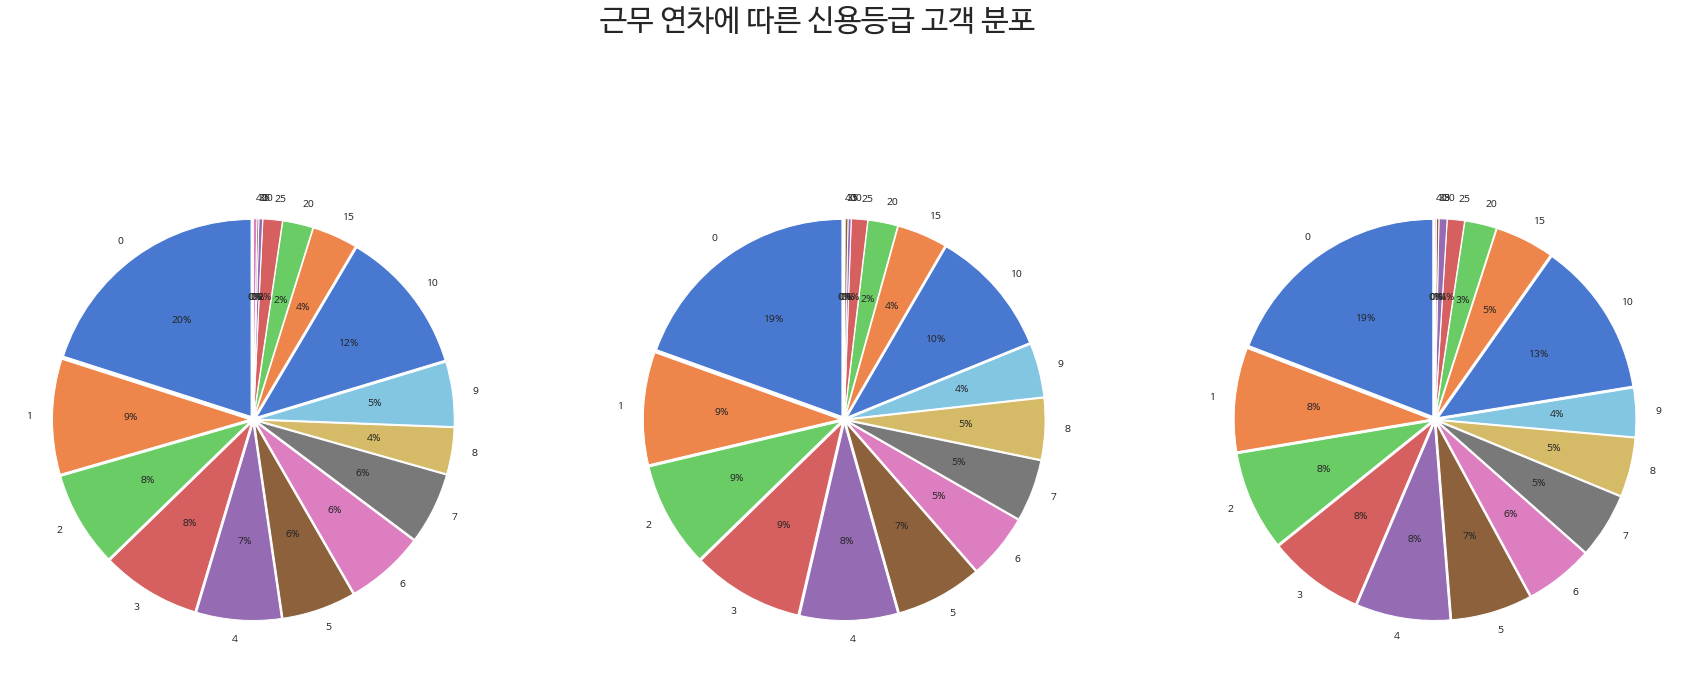


왼쪽부터 0, 1, 2등급 순서대로 표시


In [ ]:
# 신용 등급별로 근무 연차에 따른 분류
credit_work_years = train.groupby(['credit','DAYS_EMPLOYED']).credit.count()
colors = sns.color_palette('muted')
explode = pd.Series([0.02]*len(list(credit_work_years[0].index)), index = credit_work_years[0].index)
fig, ax = plt.subplots(1, 3, figsize=(30,12))
ax[0].pie(credit_work_years[0].values, labels = credit_work_years[0].index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
print()
ax[1].pie(credit_work_years[1].values, labels = credit_work_years[1].index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
print()
ax[2].pie(credit_work_years[2].values, labels = credit_work_years[2].index, colors = colors, autopct='%.0f%%', explode = explode, startangle=90)
fig.suptitle('근무 연차에 따른 신용등급 고객 분포', fontsize=30)
plt.show()
print()
print('왼쪽부터 0, 1, 2등급 순서대로 표시')

In [ ]:
print('신용0등급 고객들의 비율==> 1년 미만:20%, 1년~5년 미만:32%, 5년~10년 미만:33%, 10년 이상:12%  15년 이상:4%')
print('신용1등급 고객들의 비율==> 1년 미만:19%, 1년~5년 미만:36%, 5년~10년 미만:26%, 10년 이상:10%  15년 이상:4%')
print('신용2등급 고객들의 비율==> 1년 미만:19%, 1년~5년 미만:32%, 5년~10년 미만:27%, 10년 이상:13%  15년 이상:5%')
print()
print('신용 등급별로 근무 연차에 따라 확인한 결과는 뚜렷한 특징이 발견되지 않음')
print('==> 근무 연차만으로 신용도를 판단하기엔 위험')

신용0등급 고객들의 비율==> 1년 미만:20%, 1년~5년 미만:32%, 5년~10년 미만:33%, 10년 이상:12%  15년 이상:4%
신용1등급 고객들의 비율==> 1년 미만:19%, 1년~5년 미만:36%, 5년~10년 미만:26%, 10년 이상:10%  15년 이상:4%
신용2등급 고객들의 비율==> 1년 미만:19%, 1년~5년 미만:32%, 5년~10년 미만:27%, 10년 이상:13%  15년 이상:5%

신용 등급별로 근무 연차에 따라 확인한 결과는 뚜렷한 특징이 발견되지 않음
==> 근무 연차만으로 신용도를 판단하기엔 위험



### work_phone: 업무용 전화 소유 여부에 따른 분석

In [ ]:
train.groupby('work_phone')

phone: 전화 소유 여부

email: 이메일 소유 여부

In [ ]:
train.groupby('phone')
train.groupby('email')

### occyp_type: 직업 유형에 따른 분석

In [ ]:
train.groupby('occyp_type')

### family_size: 가족 규모에 따른 분석

In [ ]:
print(train.groupby(['credit','family_size']).credit.count())
# 이상치로 확인되는 고객들 존재. 추후 제거하여 일반적인 상황을 반영하는 데이터 셋으로 변환 필요

# 6인 가족이상일 경우 삭제하기

credit  family_size
0.0     1.0             605
        2.0            1720
        3.0             610
        4.0             251
        5.0              27
        6.0               7
        7.0               2
1.0     1.0            1318
        2.0            3249
        3.0            1088
        4.0             520
        5.0              74
        6.0              12
        7.0               6
2.0     1.0            3186
        2.0            9137
        3.0            2934
        4.0            1489
        5.0             190
        6.0              25
        7.0               1
        9.0               2
        15.0              3
        20.0              1
Name: credit, dtype: int64

### begin_month: 신용카드 발급 월에 따른 분석 => 연단위로 변경함

In [ ]:
# 신용카드 발급을 오랜 기간 한 고객은 신용 등급이 좋은가?
print(train.groupby(['credit','begin_month']).credit.count())


print('신용등급 미흡 고객의 대부분은 1년이상~4년이내 고객들로 확인')
print('신용등급 우수 고객은 카드 개설한 지 2년이내 고객들')
print()

print('1년이 넘어가면서 부터 신용등급 하락의 비율이 많아짐.')

# >>> 카드 발급한 지 5년 이상되었는데 신용등급 우수 고객들의 특징은? 

credit  begin_month
0.0     0               627
        1               731
        2               735
        3               514
        4               458
        5               157
1.0     0              1828
        1              1347
        2              1205
        3               857
        4               782
        5               248
2.0     0               991
        1              4332
        2              4334
        3              3202
        4              3050
        5              1059
Name: credit, dtype: int64
신용등급 미흡 고객의 대부분은 1년이상~4년이내 고객들로 확인
신용등급 우수 고객은 카드 개설한 지 2년이내 고객들

1년이 넘어가면서 부터 신용등급 하락의 비율이 많아짐.


### credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도에 따른 분석

In [ ]:
# 신용도가 높은 사람들의 연간 평균 소득액은 얼마인가?
print('등급별 평균 소득액')
print(train.groupby('credit').income_total.mean().round(2))
print()

print('등급별 소득액 합계')
print(train.groupby('credit').income_total.sum().round(2))
print()

print('최고 등급의 소득액과 최저 등급의 소득액에 큰 차이가 없는 것을 확인.')
print('신용 등급은 소득액의 차이와 무관하다.')

등급별 평균 소득액
credit
0.0    19.08
1.0    18.11
2.0    18.89
Name: income_total, dtype: float64

등급별 소득액 합계
credit
0.0     61478.20
1.0    113509.60
2.0    320569.07
Name: income_total, dtype: float64

최고 등급의 소득액과 최저 등급의 소득액에 큰 차이가 없는 것을 확인.
신용 등급은 소득액의 차이와 무관하다.


# RandomForest Classifier 모델 개발

In [127]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [165]:
train = pd.read_csv('/content/gdrive/MyDrive/신용카드 사용자/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/신용카드 사용자/test.csv')

In [130]:
# 데이터 확인
display(train.head(2))
display(test.head(2))
print(train.shape, test.shape)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0


(26457, 20) (10000, 19)


# 모델 개발: 데이터 전처리

In [166]:
# 불필요 컬럼 제거
train.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

In [132]:
# 결측치 확인
print(train.isna().sum())

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64


In [133]:
print(train['occyp_type'].unique())
print(train['occyp_type'].nunique())
# NaN 데이터 제외하고 18개의 유니크 값 확인

[nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']
18


In [134]:
# 약 8000개의 결측치 어떻게 처리할지 고민하기
# [1] 신용 등급값이 뭔지 확인하고, 다른 특성들(나이, 차소유, 부동산소유, 가족수, 결혼유무 등)을 고려하여 일치하는 값 중 최빈값으로 매칭
train.groupby(['occyp_type','credit']).credit.count()


# [2] 예측 모델에 직종이 상위권에 있는 특성 중요도가 아니라면, 그냥 NaN을 별도 처리 없이 진행해본다. >>> 일단 이거 진행

occyp_type             credit
Accountants            0.0        118
                       1.0        227
                       2.0        557
Cleaning staff         0.0         40
                       1.0         93
                       2.0        270
Cooking staff          0.0         58
                       1.0        110
                       2.0        289
Core staff             0.0        347
                       1.0        622
                       2.0       1677
Drivers                0.0        187
                       1.0        358
                       2.0       1030
HR staff               0.0          7
                       1.0          4
                       2.0         51
High skill tech staff  0.0        123
                       1.0        270
                       2.0        647
IT staff               0.0          8
                       1.0         10
                       2.0         23
Laborers               0.0        586
                    

In [135]:
# 중복 데이터 확인
print(train.duplicated().sum())


# 1634 개의 중복행 발견 >>> 왜?
# [가정1] 
# 하나의 카드회사 데이터가 아니라 여러 카드회사의 종합 데이터면 그럴 수 있음.
# 같은 고객이 다른 회사의 신용카드 이용객 정보에 들어가서 중복이 된 것.
# [가정1]의 경우 >>> 어차피 같은 사람의 데이터를 활용하는 것이므로 불필요한 데이터이므로 삭제 처리

# [가정2]
# 만약 한 회사의 신용카드 데이터일 경우 다른 고객 데이터이므로 삭제처리 진행해선 안됨.
# 우연히 모든 고객 정보가 일치하는 고객들이 중복 값을 일으킨 경우가 발생한 것. 
# [가정2]의 경우 중복 값 그대로 남겨둔 채 진행
# >>> [가정2]에서 의문점 발견
# 입력한 모든 정보가 일치하는 고객이 1634명이 될 가능성이 있는가? 중국 자료여서 가능성은 있다고 생각됨. 
# 만약 한국 데이터일 경우는 어떻게 처리하나?
# 진짜로 입력한 정보는 같은데 다른 고객인지 확인하는 작업이 필요. 주민등록번호/집주소/휴대폰 번호 등 개인 고유 정보를 활용을 통해 가능 

# 신용등급 컬럼을 제외하면, 2353개의 중복행이 늘어남 >>> 왜?
# [가정3]
# 여러 카드 회사 정보일 경우로 가정 (한 회사의 경우 시스템 문제로 보임 아니면 시점이 달라져 신용평가 기준이 달라졌을 경우를 고려 >>> 근데 그럼 이 데이터를 활용하는게 올바른진 모르겠음. 기준이 다 뒤섞인 데이터로 예측모델 개발하는건 바람직하지 않는 것으로 보임)
# 고객의 신용등급이 카드 회사마다 기준이 달라서 신용 등급만 다른 경우가 발생
# >>> 어느 등급의 데이터를 남겨야 할 지 고민하기
# 현재로선 신용우수 등급의 데이터가 부족해서 신용미흡 등급으로 표기된 데이터를 삭제하는 방향으로 진행
# 0이 있으면 0을 남기기, 0이 없고 1이 있으면 1남기기, 0과1 모두 없으면 2남기기 

# 가정3에 따라 진행 > 가정1의 경우도 함께 진행되므로 가정3으로 삭제처리 후 남은 중복데이터 삭제 진행(학습 시 똑같은 데이터 여러개 필요없음)


1634


In [136]:
print('중복처리되기 전 shape:', train.shape)

중복처리되기 전 shape: (26457, 18)


중복값 처리

In [167]:
def duplicate(df):
  condition1 = df.drop('credit', axis=1).duplicated(keep=False) # 신용등급 제외한 중복된 데이터 (더 많은 데이터 수 보유)
  duplicated_idx1 = condition1[condition1].index # 신용 등급 제외한 중복 데이터 리스트(인덱스)
  print(df.loc[duplicated_idx1].shape, '신용등급만 다를 수 있는 shape')
  duplicated_df_idx = df.loc[duplicated_idx1].index # 신용정보 없는 중복 데이터들 > 신용정보 필요함 > 인덱스화해서 df에 대입하기
  duplicated_df = df.loc[duplicated_df_idx].sort_values(by='credit') # 중복된 데이터들을 신용 0등급 > 1등급 > 2등급 순으로 배치 후 
  # 신용등급만 다를 수 있는 중복 데이터 추출 완료
  print(duplicated_df.shape, '신용등급만 다를 수 있는 shape') 
  duplicated_df.drop_duplicates(keep='first', inplace=True) # 중복된 데이터 삭제(0등급이 먼저 배치되어 있으므로 삭제되는건 0등급보다 뒤에 있는 값들임) 
  # 중복 데이터 중에 우수 등급의 고객들만 추출완료
  print(duplicated_df.shape, '신용 미흡한 중복값들 제거 된 후 shape') # >>> 제거 될 건 다 제거되고 남은 값들임

  df.drop(index=duplicated_idx1, inplace=True) # 기존 데이터에서의 (신용정보만 다른 값 포함한) 중복되는 모든 데이터 삭제
  print(df.shape, '원본데이터에서 중복되는 모든값 삭제한 shape')
  df = pd.concat([df, duplicated_df], axis=0, ignore_index=True) # 기존 데이터에 삭제된 우수 등급 고객들만 다시 추가
  print('---')
  print(df.shape, '최종적으로 중복값들 중에 우수 고객들과 다시 합친 최종 shape')
  return df


duplicated_train = duplicate(train) 
display(duplicated_train.head(3))

(4497, 18) 신용등급만 다를 수 있는 shape
(4497, 18) 신용등급만 다를 수 있는 shape
(2863, 18) 신용 미흡한 중복값들 제거 된 후 shape
(21960, 18) 원본데이터에서 중복되는 모든값 삭제한 shape
---
(24823, 18) 최종적으로 중복값들 중에 우수 고객들과 다시 합친 최종 shape


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
2,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0


In [138]:
print('중복값 처리 개수:', 26457 - 24823)

중복값 처리 개수: 1634


결측치 처리

In [168]:
def fillna(df):
  df['occyp_type'].fillna('NaN', inplace=True)
  return df

nan_prepro_train = fillna(duplicated_train)

데이터 전처리

In [169]:
def gender(df): # F(여자):0 M(남자):1
  df['gender'] = df['gender'].replace(['F','M'], [0, 1])
  return df['gender']

def car(df): # N(차 없음):0 Y(차 있음):1
  df['car'] = df['car'].replace(['N','Y'], [0, 1])
  return df['car']

def reality(df): # N(부동산 없음):0 Y(부동산 있음):1
  df['reality'] = df['reality'].replace(['N','Y'], [0, 1])
  return df['reality']

def income_total(df):
  df['income_total'] = df['income_total'] / 10000
  return df['income_total'] # 소득액 10,000 단위로 환산

def income_type(df): # 소득 유형 >> ordinal-encoding 수행
  pass

def edu_type(df): #  'Lower secondary(초등)':1, 'Secondary / secondary special(중등)':2, 'Incomplete higher(고등 중퇴)':3, 'Higher education(고등)':4, 'Academic degree(대학)':5
  df['edu_type'] = df['edu_type'].replace(['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'], [4, 2, 3, 1 ,5])
  return df['edu_type']

def family_type(df): # 결혼 여부 >> ordinal-encoding 수행
  pass

def house_type(df): # 생활 형식 >> ordinal-encoding 수행
  pass

def occupa_type(df): # 직업 유형(직종) >> 결측치 'NaN'문자열로 대체
  pass  

# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
def DAYS_BIRTH(df):
  df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(abs) / 365
  df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(round)
  df['DAYS_BIRTH'] = np.select([df['DAYS_BIRTH'] < 10, df['DAYS_BIRTH'] < 20, df['DAYS_BIRTH'] < 30, df['DAYS_BIRTH'] < 40, df['DAYS_BIRTH'] < 50, df['DAYS_BIRTH'] < 60, df['DAYS_BIRTH'] < 70, df['DAYS_BIRTH'] >= 70],
                                [0, 10, 20, 30, 40, 50, 60, 70])
  return df['DAYS_BIRTH'] # 나이는 연령대로 환산

# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함
def DAYS_EMPLOYED(df): 
  condition = (df['DAYS_EMPLOYED'] > 0)
  df.loc[condition, 'DAYS_EMPLOYED'] = 0
  df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(abs) / 365
  df['DAYS_EMPLOYED'] = np.select([df['DAYS_EMPLOYED'] < 10, df['DAYS_EMPLOYED'] < 15, df['DAYS_EMPLOYED'] < 20, df['DAYS_EMPLOYED'] < 25, df['DAYS_EMPLOYED'] < 30, df['DAYS_EMPLOYED'] < 35, df['DAYS_EMPLOYED'] < 40, df['DAYS_EMPLOYED'] >= 40],
                                   [df['DAYS_EMPLOYED'], 10, 15, 20, 25, 30, 35, 40])
  df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(round)
  return df['DAYS_EMPLOYED'] # 일 시작한지 '몇 년' 됐는지 리턴. 1년 단위로 계산 후 => 10년차 이후 부터 5년 단위로 갱신

# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
def begin_month(df):
  df['begin_month'] = df['begin_month'].apply(abs) / 12
  df['begin_month'] = df['begin_month'].apply(round)
  return df['begin_month'] # 신용카드 발급한 지 '몇 년' 됐는지 리턴

def estimated_income(df): # 신용카드 이용자의 실제 소득 추정치(결혼유무와 가족 구성원 수 고려)
  df['estimated_income'] = np.select([(df['family_type'] == 'Civil marriage'), (df['family_type'] == 'Married')], 
                                     [df['income_total']/df['family_size'], df['income_total']/df['family_size']], 
                                      df['income_total'])
  return df['estimated_income'] 


nan_prepro_train['gender'] = gender(nan_prepro_train)
nan_prepro_train['car'] = car(nan_prepro_train)
nan_prepro_train['reality'] = reality(nan_prepro_train)
nan_prepro_train['income_total'] = income_total(nan_prepro_train)
nan_prepro_train['edu_type'] = edu_type(nan_prepro_train)
nan_prepro_train['DAYS_BIRTH'] = DAYS_BIRTH(nan_prepro_train)
nan_prepro_train['DAYS_EMPLOYED'] = DAYS_EMPLOYED(nan_prepro_train)
nan_prepro_train['begin_month'] = begin_month(nan_prepro_train)
nan_prepro_train['estimated_income']  = estimated_income(nan_prepro_train)

condition = nan_prepro_train['family_size'] < 6
condition_index = condition[condition].index
nan_prepro_train = nan_prepro_train.loc[condition_index]

prepro_train = nan_prepro_train
display(prepro_train.head(3))
print()
print(prepro_train.info())
print()
print(display(prepro_train.describe()))

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,estimated_income
0,0,0,0,0,20.25,Commercial associate,4,Married,Municipal apartment,30,10,0,0,0,NaN,2.0,0,1.0,10.125
1,0,0,1,0,20.25,Commercial associate,2,Married,House / apartment,40,6,0,1,0,Sales staff,2.0,3,0.0,10.125
2,0,1,1,0,15.75,State servant,4,Married,House / apartment,40,6,0,0,0,Managers,2.0,2,2.0,7.875



<class 'pandas.core.frame.DataFrame'>
Int64Index: 24766 entries, 0 to 24822
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            24766 non-null  int64  
 1   car               24766 non-null  int64  
 2   reality           24766 non-null  int64  
 3   child_num         24766 non-null  int64  
 4   income_total      24766 non-null  float64
 5   income_type       24766 non-null  object 
 6   edu_type          24766 non-null  int64  
 7   family_type       24766 non-null  object 
 8   house_type        24766 non-null  object 
 9   DAYS_BIRTH        24766 non-null  int64  
 10  DAYS_EMPLOYED     24766 non-null  int64  
 11  work_phone        24766 non-null  int64  
 12  phone             24766 non-null  int64  
 13  email             24766 non-null  int64  
 14  occyp_type        24766 non-null  object 
 15  family_size       24766 non-null  float64
 16  begin_month       24766 non-null  int64

,gender,car,reality,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,estimated_income
count,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000,24766.000000
mean,0.331382,0.378866,0.672777,0.420375,18.690070,2.573569,39.152467,5.612372,0.225269,0.294638,0.091739,2.187757,2.153840,1.514738,10.507214
std,0.470719,0.485115,0.469209,0.703844,10.093115,0.900668,12.072716,5.812824,0.417767,0.455889,0.288663,0.881763,1.432623,0.704407,7.806767
min,0.000000,0.000000,0.000000,0.000000,2.700000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.756000
25%,0.000000,0.000000,0.000000,0.000000,12.150000,2.000000,30.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,5.625000
50%,0.000000,0.000000,1.000000,0.000000,15.750000,2.000000,40.000000,4.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,8.100000
75%,1.000000,1.000000,1.000000,1.000000,22.500000,4.000000,50.000000,9.000000,0.000000,1.000000,0.000000,3.000000,3.000000,2.000000,13.500000
max,1.000000,1.000000,1.000000,4.000000,157.500000,5.000000,60.000000,40.000000,1.000000,1.000000,1.000000,5.000000,5.000000,2.000000,157.500000


None


category


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


                  income_total  estimated_income
income_total           1.00000           0.71254
estimated_income       0.71254           1.00000


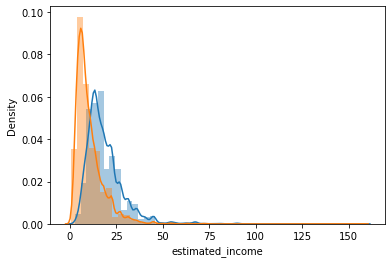

In [170]:
# 'estimated_income'과 'income_total'
prepro_train['credit'] = prepro_train['credit'].astype('category')
print(prepro_train['credit'].dtype)
sns.distplot(prepro_train['income_total'], kde=True)
sns.distplot(prepro_train['estimated_income'], kde=True)

print(prepro_train[['income_total','estimated_income']].corr())
# 강한 양의 상관관계를 보이므로 기존의 'income_total' 제거
prepro_train.drop('income_total', axis=1, inplace=True)

In [48]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder(
cols=['income_type','family_type','house_type','occyp_type'],
drop_invariant=True,
verbose=1
)

train_encoded = encoder.fit_transform(prepro_train)

In [172]:
display(train_encoded)
train_encoded.info()

,gender,car,reality,child_num,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,estimated_income
0,0,0,0,0,1,4,1,1,30,10,0,0,0,1,2.0,0,1.0,10.125
1,0,0,1,0,1,2,1,2,40,6,0,1,0,2,2.0,3,0.0,10.125
2,0,1,1,0,2,4,1,2,40,6,0,0,0,3,2.0,2,2.0,7.875
3,0,0,1,2,3,2,1,2,30,10,0,0,1,4,4.0,2,1.0,6.750
4,0,0,0,0,3,2,2,2,40,5,0,0,1,5,1.0,3,2.0,31.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24818,0,1,1,2,1,4,1,2,30,1,0,1,0,3,4.0,5,2.0,6.750
24819,0,0,0,1,3,4,1,2,40,1,0,1,0,2,3.0,1,2.0,5.250
24820,1,0,1,2,4,4,1,2,40,0,0,0,0,1,4.0,1,2.0,3.375
24821,0,0,1,2,3,4,1,2,30,15,0,1,0,5,4.0,5,2.0,5.625


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24766 entries, 0 to 24822
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            24766 non-null  int64   
 1   car               24766 non-null  int64   
 2   reality           24766 non-null  int64   
 3   child_num         24766 non-null  int64   
 4   income_type       24766 non-null  int64   
 5   edu_type          24766 non-null  int64   
 6   family_type       24766 non-null  int64   
 7   house_type        24766 non-null  int64   
 8   DAYS_BIRTH        24766 non-null  int64   
 9   DAYS_EMPLOYED     24766 non-null  int64   
 10  work_phone        24766 non-null  int64   
 11  phone             24766 non-null  int64   
 12  email             24766 non-null  int64   
 13  occyp_type        24766 non-null  int64   
 14  family_size       24766 non-null  float64 
 15  begin_month       24766 non-null  int64   
 16  credit            2476

# 모델 개발: 모델 설계

In [173]:
# 모델 설계
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=100, 
                     n_jobs=-1)

모델 개발: 모델 학습을 위한 데이터 분리

In [174]:
X = train_encoded.drop('credit', axis=1)
y = train_encoded['credit']

print(X.shape, y.shape)

(24766, 17) (24766,)


In [175]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=2)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(19812, 17) (4954, 17) (19812,) (4954,)


모델 학습

In [179]:
xgbc.fit(
        X_train, y_train, # 전처리된 데이터로 학습 시작 
        eval_metric='logloss'
        )  # 학습 완료

XGBClassifier(n_jobs=-1, objective='multi:softprob')

성능 확인

In [184]:
train_pred = xgbc.predict(X)

from sklearn.metrics import accuracy_score, f1_score

print('train 데이터 예측 정확도:', xgbc.score(X_val, y_val))

train 데이터 예측 정확도: 0.6667339523617279


In [185]:
pd.DataFrame(train_pred).value_counts()

2.0    21597
1.0     3163
0.0        6
dtype: int64

test data 예측 결과

In [113]:
test = pd.read_csv('/content/gdrive/MyDrive/신용카드 사용자/test.csv')
test.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

In [114]:
# test data는 중복X 
# >>> 결측치, 그외 전처리 및 인코딩수행

nan_prepro_test = fillna(test) # 결측치 제거X > 'NaN'문자로 대체

# 그외 전처리
nan_prepro_test['gender'] = gender(nan_prepro_test)
nan_prepro_test['car'] = car(nan_prepro_test)
nan_prepro_test['reality'] = reality(nan_prepro_test)
nan_prepro_test['income_total'] = income_total(nan_prepro_test)
nan_prepro_test['edu_type'] = edu_type(nan_prepro_test)
nan_prepro_test['DAYS_BIRTH'] = DAYS_BIRTH(nan_prepro_test)
nan_prepro_test['DAYS_EMPLOYED'] = DAYS_EMPLOYED(nan_prepro_test)
nan_prepro_test['begin_month'] = begin_month(nan_prepro_test)
nan_prepro_test['estimated_income']  = estimated_income(nan_prepro_test)
prepro_test = nan_prepro_test

# 특성 간 상관관계 보이는 컬럼 제거
prepro_test.drop('income_total', axis=1, inplace=True)

# dtype = 'object' 인코딩
test_encoded = encoder.fit_transform(prepro_test)

In [124]:
test_pred = xgbc.predict(test_encoded)
pd.DataFrame(test_pred).value_counts()

2.0    8780
1.0    1216
0.0       4
dtype: int64